In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# What is this code doing?

* Divides dataset to 10 categories in simulation.

* Trains GM.

* Prunes GM & Show Results.

* Shows participation & global sparsity results.

* Use standart Federated Learning as baseline.

***
### Core contributions:

* Pruning increases model sparsification significantly while still preserving a good performance.

* Thus, to use in the Federated Learning system, a group of talented devices in terms of hardware can train a dense model and then gradually rise sparsification threshold of model to assign them as proper initial global model for model contrainted devices.

* As a result, those assigned proper models own tuned parameters from previous training, which act as transfer learning and increase model generality (1). Moreover, number of devices participate to Federated Learning system is increased by using a trainable model (2).

* Furthermore, since each device trains its proper model, synchronisation during training also rises.

***
# Install Necessary Libraries:

In [2]:
!pip install -U flwr["simulation"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 39.9 MB/s eta 0:00:00
  Created wheel for gpustat: filename=gpustat-1.1-py3-none-any.

In [3]:
!pip install -U flwr==0.19.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: flwr
    Found existing installation: flwr 1.4.0
    Uninstalling flwr-1.4.0:
      Successfully uninstalled flwr-1.4.0


In [4]:
!pip install torch==1.13.1 torchvision==0.14.1 numpy==1.24.1 pandas==1.5.3 matplotlib==3.6.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: matplotlib


***
## 1- Importing Libraries:

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10
import torchvision.models as models
import torchvision

import torch.nn.utils.prune as prune


import flwr as fl

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from collections import OrderedDict
from typing import Dict, List, Optional, Tuple
import json
import os

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {DEVICE}")

Training on cpu


In [6]:
(fl.__version__, torch.__version__, torchvision.__version__, np.__version__, pd.__version__,
json.__version__, matplotlib.__version__)

library_versions = {"flwr": fl.__version__, "torch": torch.__version__,
                    "torchvision": torchvision.__version__, "numpy": np.__version__,
                    "pandas": pd.__version__, "json": json.__version__,
                    "matplotlib": matplotlib.__version__}

with open('library_versions.txt', 'w') as f:
    f.write(json.dumps(library_versions))

f.close()

***
## 2- Initilisation/Hyperparameters:

In [7]:
# Total number of devices (For D1 devices):
NUM_DEVICES = 100

# Model aggregation (Training round):
NUM_ROUNDS = 100

# On device local updates:
LOCAL_EPOCH = 3

# You may need to decrease it since total image per device is 60.
BATCH_SIZE = 64

# D1, D2, D3, ... , D10:
NUM_DEVICE_TYPE = 10

hyperparameters = {'NUM_DEVICES': NUM_DEVICES,
                   'NUM_ROUNDS': NUM_ROUNDS,
                   'NUM_DEVICE_TYPE': NUM_DEVICE_TYPE,
                   'BATCH_SIZE': BATCH_SIZE,
                   'LOCAL_EPOCH': LOCAL_EPOCH}

with open('hyperparameters.txt', 'w') as f:
    f.write(json.dumps(hyperparameters))

f.close()

***
## 3- Load Datasets:

In [8]:
def load_datasets(num_clients: int):


    # ######################## Test Dataset Preparetion #########################
    testset = torchvision.datasets.MNIST("./data",
                                         train = False,
                                         transform = transforms.Compose([transforms.Resize((32,32)),
                                                                         transforms.ToTensor(),
                                                                         transforms.Normalize(mean = (0.1325,),
                                                                                              std = (0.3105,))]),
                                         download=True)

    testloader = DataLoader(testset, batch_size=BATCH_SIZE)


    # #################### Train and Val Datasets Preparetion ####################
    trainset = torchvision.datasets.MNIST("./data",
                                          train = True,
                                          transform = transforms.Compose([transforms.Resize((32,32)),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean = (0.1307,),
                                                                                               std = (0.3081,))]),
                                          download=True)

    plan = num_clients * NUM_DEVICE_TYPE
    partition_size = len(trainset) // plan
    lengths = [partition_size] * plan
    # plan = num_clients * 2
    # partition_size = len(trainset) // plan
    # lengths = [partition_size] * plan
    # partition_size = len(trainset) // num_clients
    # lengths = [partition_size] * num_clients

    datasets = random_split(trainset, lengths, torch.Generator().manual_seed(42))


    trainloaders_1, valloaders_1 = [], []
    trainloaders_2, valloaders_2 = [], []
    trainloaders_3, valloaders_3 = [], []
    trainloaders_4, valloaders_4 = [], []
    trainloaders_5, valloaders_5 = [], []
    trainloaders_6, valloaders_6 = [], []
    trainloaders_7, valloaders_7 = [], []
    trainloaders_8, valloaders_8 = [], []
    trainloaders_9, valloaders_9 = [], []
    trainloaders_10, valloaders_10 = [], []


    # The amount of data should be shared per device class (D1, D2, ... , D10):
    amount = (len(datasets) // NUM_DEVICE_TYPE)

    # Sharing dataset to devices:
    for i, ds in enumerate(datasets):
        len_val = len(ds) // 10
        len_train = len(ds) - len_val
        lengths = [len_train, len_val]

        ds_train, ds_val = random_split(ds, lengths, torch.Generator().manual_seed(42))

        # D1 devices:
        if (amount*0 <= i) and (i < amount*1):
            trainloaders_1.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_1.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D2 devices:
        elif (amount*1 <= i) and (i < amount*2):
            trainloaders_2.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_2.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D3 devices:
        elif (amount*2 <= i) and (i < amount*3):
            trainloaders_3.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_3.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D4 devices:
        elif (amount*3 <= i) and (i < amount*4):
            trainloaders_4.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_4.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D5 devices:
        elif (amount*4 <= i) and (i < amount*5):
            trainloaders_5.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_5.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D6 devices:
        elif (amount*5 <= i) and (i < amount*6):
            trainloaders_6.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_6.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D7 devices:
        elif (amount*6 <= i) and (i < amount*7):
            trainloaders_7.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_7.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D8 devices:
        elif (amount*7 <= i) and (i < amount*8):
            trainloaders_8.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_8.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D9 devices:
        elif (amount*8 <= i) and (i < amount*9):
            trainloaders_9.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_9.append(DataLoader(ds_val, batch_size=BATCH_SIZE))

        # D10 devices:
        elif (amount*9 <= i) and (i < amount*10):
            trainloaders_10.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
            valloaders_10.append(DataLoader(ds_val, batch_size=BATCH_SIZE))


    return (trainloaders_1, valloaders_1, trainloaders_2, valloaders_2,
            trainloaders_3, valloaders_3, trainloaders_4, valloaders_4,
            trainloaders_5, valloaders_5, trainloaders_6, valloaders_6,
            trainloaders_7, valloaders_7, trainloaders_8, valloaders_8,
            trainloaders_9, valloaders_9, trainloaders_10, valloaders_10,
            testloader)

In [9]:
trainloaders_1, valloaders_1, trainloaders_2, valloaders_2, trainloaders_3, valloaders_3, trainloaders_4, valloaders_4, trainloaders_5, valloaders_5, trainloaders_6, valloaders_6, trainloaders_7, valloaders_7, trainloaders_8, valloaders_8, trainloaders_9, valloaders_9, trainloaders_10, valloaders_10, testloader = load_datasets(NUM_DEVICES)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [10]:
# D1 devices are choosed to train:
trainloaders = trainloaders_1
valloaders = valloaders_1

***
## 4- Flower Client to Simulate Devices:

In [11]:
class FlowerClient(fl.client.NumPyClient):
    def __init__(self, cid, net, trainloader, valloader):
        self.cid = cid
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader

    def get_parameters(self):
        print(f"[Client {self.cid}] get_parameters")

        return get_parameters(self.net)

    # Fit Function A:
    # Configuration from client-side
    # To make client-side execution (trainig, evaluation).
    def fit(self, parameters, config):
        print(f"[Client {self.cid}] fit, config: {config}")
        set_parameters(self.net, parameters)
        train(self.net, self.trainloader, epochs=1)

        return get_parameters(self.net), len(self.trainloader), {}

    """
    # Fit Function B:
    # To make configuration values from the server to the clients using a dictionary.
    def fit(self, parameters, config):
        # Read values from config
        current_round = config["current_round"]
        local_epochs = config["local_epochs"]

        # Use values provided by the config
        print(f"[Client {self.cid}, round {current_round}] fit, config: {config}")
        set_parameters(self.net, parameters)
        train(self.net, self.trainloader, epochs=local_epochs)
        return get_parameters(self.net), len(self.trainloader), {}
    """

    # This function is included for case of client side (federated) evaluation is required to use.
    def evaluate(self, parameters, config):
        print(f"[Client {self.cid}] evaluate, config: {config}")
        set_parameters(self.net, parameters)
        loss, accuracy = test(self.net, self.valloader)

        return float(loss), len(self.valloader), {"accuracy": float(accuracy)}


def client_fn(cid) -> FlowerClient:
    net = Net().to(DEVICE)
    trainloader = trainloaders[int(cid)]
    valloader = valloaders[int(cid)]

    return FlowerClient(cid, net, trainloader, valloader)

***
## 5- Model Preparetion:

In [12]:
# LeNet:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [13]:
def get_parameters(net) -> List[np.ndarray]:
    return [val.cpu().numpy() for _, val in net.state_dict().items()]

def set_parameters(net, parameters: List[np.ndarray]):
    params_dict = zip(net.state_dict().keys(), parameters)
    state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
    net.load_state_dict(state_dict, strict=True)

***
## 6- Train & Test Functions:

In [14]:
def train(net, trainloader, epochs: int):
    """Train the network on the training set."""

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters())
    net.train()

    for epoch in range(epochs):
        correct, total, epoch_loss = 0, 0, 0.0

        for images, labels in trainloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(net(images), labels)
            loss.backward()
            optimizer.step()
            # Metrics
            epoch_loss += loss
            total += labels.size(0)
            correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()

        epoch_loss /= len(testloader.dataset)
        epoch_acc = correct / total
        print(f"Epoch {epoch+1}: train loss {epoch_loss}, accuracy {epoch_acc}")



def test_model(net, testloader):
    """Evaluate the network on the entire test set."""

    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    net.eval()

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = net(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    loss /= len(testloader.dataset)
    accuracy = correct / total


    return [loss, accuracy]

***
## 7- System Running (Training):

In [15]:
def fit_config(rnd: int):
    config = {
        "current_round": rnd,
        "local_epochs": LOCAL_EPOCH,
    }
    return config

##################################################################################

class SaveModelStrategy(fl.server.strategy.FedAvg):
    def aggregate_fit(
        self,
        rnd: int,
        results: List[Tuple[fl.server.client_proxy.ClientProxy, fl.common.FitRes]],
        failures: List[BaseException],
    ) -> Optional[fl.common.Weights]:

        # Aggregate model weights using weighted average and store checkpoint
        aggregated_parameters_tuple = super().aggregate_fit(rnd, results, failures)
        aggregated_parameters, _ = aggregated_parameters_tuple
        # log_dict['aggregated_parameters']=aggregated_parameters

        if aggregated_parameters is not None:
            print(f"Saving round {rnd} aggregated_parameters...")
            # Convert `Parameters` to `List[np.ndarray]`
            aggregated_weights: List[np.ndarray] = fl.common.parameters_to_weights(aggregated_parameters)

            # Convert `List[np.ndarray]` to PyTorch`state_dict`
            params_dict = zip(Net().state_dict().keys(), aggregated_weights)
            state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})

            net = Net().to(DEVICE)
            net.load_state_dict(state_dict, strict=True)

            # torch.save(Net().state_dict(), PATH_TO_EXPERIMENT + f"model_round_{rnd}.pth")
            torch.save(net.state_dict(), os.getcwd() + '/' + str(rnd) + '.pth')

        return aggregated_parameters_tuple


##################################################################################

# Create strategy and run server
strategy = SaveModelStrategy(

    # fl.server.strategy.FedAvg(  # .FedAdagrad(    (As an alternative).
    fraction_fit=0.3,  # Train on 30% of clients (each round)
    fraction_eval=0.3,  # Evaluate on 30% of clients (each round)
    min_fit_clients=3,
    min_eval_clients=3,
    min_available_clients=NUM_DEVICES,

    initial_parameters=fl.common.weights_to_parameters(get_parameters(Net())),

    on_fit_config_fn=fit_config,
    # To evaluate aggregated model parameters on the server-side, open evaluate function above and run below:
    # eval_fn=evaluate,  # Pass the evaluation function
    # (same arguments as FedAvg here)
)

"""
strategy = fl.server.strategy.FedAvg(  # .FedAdagrad(    (As an alternative).
    fraction_fit=0.3,  # Train on 30% of clients (each round)
    fraction_eval=0.3,  # Evaluate on 30% of clients (each round)
    min_fit_clients=3,
    min_eval_clients=3,
    min_available_clients=NUM_DEVICES,

    initial_parameters=fl.common.weights_to_parameters(get_parameters(Net())),

    on_fit_config_fn=fit_config,
    # To evaluate aggregated model parameters on the server-side, open evaluate function above and run below:
    # eval_fn=evaluate,  # Pass the evaluation function
)
"""

fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=NUM_DEVICES,
    num_rounds=NUM_ROUNDS,
    strategy=strategy,
)

2023-07-19 14:08:01,868	INFO worker.py:1636 -- Started a local Ray instance.
INFO flower 2023-07-19 14:08:04,429 | app.py:155 | Ray initialized with resources: {'object_store_memory': 3909042585.0, 'memory': 7818085172.0, 'CPU': 2.0, 'node:172.28.0.12': 1.0}
INFO:flower:Ray initialized with resources: {'object_store_memory': 3909042585.0, 'memory': 7818085172.0, 'CPU': 2.0, 'node:172.28.0.12': 1.0}
INFO flower 2023-07-19 14:08:04,432 | app.py:171 | Starting Flower simulation running: Config(num_rounds=100, round_timeout=None)
INFO:flower:Starting Flower simulation running: Config(num_rounds=100, round_timeout=None)
INFO flower 2023-07-19 14:08:04,441 | server.py:84 | Initializing global parameters
INFO:flower:Initializing global parameters
INFO flower 2023-07-19 14:08:04,444 | server.py:252 | Using initial parameters provided by strategy
INFO:flower:Using initial parameters provided by strategy
INFO flower 2023-07-19 14:08:04,451 | server.py:86 | Evaluating initial parameters
INFO:flow

(launch_and_fit pid=2406) [Client 75] fit, config: {'current_round': 1, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00022996391635388136, accuracy 0.14814814814814814
(launch_and_fit pid=2406) [Client 48] fit, config: {'current_round': 1, 'local_epochs': 3} [repeated 13x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(launch_and_fit pid=2406) Epoch 1: train loss 0.0002296162856509909, accuracy 0.12962962962962962 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:08:20,755 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
WARNING flower 2023-07-19 14:08:20,887 | fedavg.py:237 | No fit_metrics_aggregation_fn provided
DEBUG flower 2023-07-19 14:08:20,911 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 1 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 82] evaluate, config: {}
(launch_and_fit pid=2406) [Client 10] fit, config: {'current_round': 1, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00022969165001995862, accuracy 0.12962962962962962 [repeated 16x across cluster]
(launch_and_evaluate pid=2405) [Client 2] evaluate, config: {} [repeated 19x across cluster]


DEBUG flower 2023-07-19 14:08:29,448 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:08:29,456 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 52] fit, config: {'current_round': 2, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 0.00022831327805761248, accuracy 0.2962962962962963
(launch_and_evaluate pid=2405) [Client 74] evaluate, config: {} [repeated 10x across cluster]
(launch_and_fit pid=2406) [Client 67] fit, config: {'current_round': 2, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.0002267208619741723, accuracy 0.2962962962962963 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:08:38,357 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:08:38,461 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 2 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 6] evaluate, config: {}
(launch_and_fit pid=2406) [Client 30] fit, config: {'current_round': 2, 'local_epochs': 3} [repeated 13x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.0002309234841959551, accuracy 0.16666666666666666 [repeated 13x across cluster]
(launch_and_evaluate pid=2405) [Client 59] evaluate, config: {} [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:08:46,994 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:08:47,000 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 86] fit, config: {'current_round': 3, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.0002259531756862998, accuracy 0.3148148148148148
(launch_and_evaluate pid=2406) [Client 14] evaluate, config: {} [repeated 13x across cluster]
(launch_and_fit pid=2406) [Client 58] fit, config: {'current_round': 3, 'local_epochs': 3} [repeated 17x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.0002258087624795735, accuracy 0.3148148148148148 [repeated 17x across cluster]
(launch_and_fit pid=2406) 


DEBUG flower 2023-07-19 14:08:55,894 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:08:55,991 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 3 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 51] evaluate, config: {}
(launch_and_fit pid=2406) [Client 2] fit, config: {'current_round': 3, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00022728831390850246, accuracy 0.35185185185185186 [repeated 12x across cluster]
(launch_and_evaluate pid=2406) [Client 63] evaluate, config: {} [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:09:04,989 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:09:05,004 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 64] fit, config: {'current_round': 4, 'local_epochs': 3}
(launch_and_evaluate pid=2406) [Client 16] evaluate, config: {} [repeated 8x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00022615850321017206, accuracy 0.2962962962962963
(launch_and_fit pid=2405) [Client 32] fit, config: {'current_round': 4, 'local_epochs': 3} [repeated 11x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.0002239454333903268, accuracy 0.4074074074074074 [repeated 13x across cluster]
(launch_and_fit pid=2406) [Client 10] fit, config: {'current_round': 4, 'local_epochs': 3} [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:09:19,452 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:09:19,566 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 4 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 84] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00022352096857503057, accuracy 0.3333333333333333 [repeated 16x across cluster]
(launch_and_fit pid=2406) [Client 19] evaluate, config: {}


DEBUG flower 2023-07-19 14:09:24,584 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:09:24,592 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 6] fit, config: {'current_round': 5, 'local_epochs': 3}
(launch_and_evaluate pid=2406) [Client 1] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00022400254965759814, accuracy 0.2777777777777778
(launch_and_fit pid=2405) [Client 8] fit, config: {'current_round': 5, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 0.00022247892047744244, accuracy 0.3888888888888889
(launch_and_fit pid=2406) [Client 47] fit, config: {'current_round': 5, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00022334484674502164, accuracy 0.35185185185185186 [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:09:31,604 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:09:31,846 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 5 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 42] evaluate, config: {}
(launch_and_fit pid=2406) [Client 92] fit, config: {'current_round': 5, 'local_epochs': 3} [repeated 6x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00022356532281264663, accuracy 0.3148148148148148 [repeated 5x across cluster]
(launch_and_evaluate pid=2405) [Client 21] evaluate, config: {} [repeated 19x across cluster]


DEBUG flower 2023-07-19 14:09:39,804 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:09:39,815 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 48] fit, config: {'current_round': 6, 'local_epochs': 3}
(launch_and_fit pid=2406) [Client 64] fit, config: {'current_round': 6, 'local_epochs': 3}
(launch_and_fit pid=2406) [Client 77] fit, config: {'current_round': 6, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.0002218803419964388, accuracy 0.3333333333333333 [repeated 2x across cluster]
(launch_and_evaluate pid=2406) [Client 6] evaluate, config: {} [repeated 10x across cluster]


DEBUG flower 2023-07-19 14:09:46,023 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2405) [Client 94] fit, config: {'current_round': 6, 'local_epochs': 3} [repeated 25x across cluster]


DEBUG flower 2023-07-19 14:09:46,122 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 6 aggregated_parameters...
(launch_and_fit pid=2405) Epoch 1: train loss 0.0002201774186687544, accuracy 0.4074074074074074 [repeated 28x across cluster]
(launch_and_evaluate pid=2405) [Client 82] evaluate, config: {} [repeated 10x across cluster]
(launch_and_fit pid=2405) [Client 0] fit, config: {'current_round': 6, 'local_epochs': 3} [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:09:51,548 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:09:51,559 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) Epoch 1: train loss 0.00021219541667960584, accuracy 0.6111111111111112
(launch_and_evaluate pid=2405) [Client 47] evaluate, config: {} [repeated 20x across cluster]
(launch_and_fit pid=2405) [Client 45] fit, config: {'current_round': 7, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00021835534425918013, accuracy 0.3888888888888889 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:10:00,455 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:10:00,551 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 7 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 99] evaluate, config: {}
(launch_and_fit pid=2406) [Client 24] fit, config: {'current_round': 7, 'local_epochs': 3} [repeated 18x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00021693827875424176, accuracy 0.46296296296296297 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:10:05,431 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:10:05,434 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 54] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 93] fit, config: {'current_round': 8, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00021035128156654537, accuracy 0.5 [repeated 10x across cluster]
(launch_and_fit pid=2405) [Client 41] fit, config: {'current_round': 8, 'local_epochs': 3} [repeated 25x across cluster]


DEBUG flower 2023-07-19 14:10:12,184 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:10:12,322 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 8 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 42] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00021383518469519913, accuracy 0.4074074074074074 [repeated 20x across cluster]
(launch_and_fit pid=2406) [Client 46] fit, config: {'current_round': 8, 'local_epochs': 3} [repeated 3x across cluster]
(launch_and_evaluate pid=2405) [Client 49] evaluate, config: {} [repeated 19x across cluster]


DEBUG flower 2023-07-19 14:10:20,348 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:10:20,354 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) Epoch 1: train loss 0.0002080653648590669, accuracy 0.6111111111111112
(launch_and_fit pid=2405) [Client 11] fit, config: {'current_round': 9, 'local_epochs': 3} [repeated 4x across cluster]
(launch_and_evaluate pid=2406) [Client 33] evaluate, config: {} [repeated 10x across cluster]


DEBUG flower 2023-07-19 14:10:26,298 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:10:26,649 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) Epoch 1: train loss 0.00020607768965419382, accuracy 0.6296296296296297 [repeated 29x across cluster]
Saving round 9 aggregated_parameters...
(launch_and_fit pid=2406) [Client 8] fit, config: {'current_round': 9, 'local_epochs': 3} [repeated 26x across cluster]
(launch_and_evaluate pid=2405) [Client 34] evaluate, config: {} [repeated 7x across cluster]


DEBUG flower 2023-07-19 14:10:32,293 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:10:32,306 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 30] fit, config: {'current_round': 10, 'local_epochs': 3}
(launch_and_fit pid=2406) [Client 1] fit, config: {'current_round': 10, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 0.00021392341295722872, accuracy 0.3148148148148148
(launch_and_evaluate pid=2406) [Client 0] evaluate, config: {} [repeated 23x across cluster]
(launch_and_fit pid=2406) [Client 31] fit, config: {'current_round': 10, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.0002062358835246414, accuracy 0.5370370370370371 [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:10:41,764 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:10:41,862 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 10 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 7] evaluate, config: {}
(launch_and_fit pid=2406) [Client 85] fit, config: {'current_round': 10, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.0002075915108434856, accuracy 0.4074074074074074 [repeated 12x across cluster]


DEBUG flower 2023-07-19 14:10:46,721 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:10:46,734 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 74] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2405) [Client 58] fit, config: {'current_round': 11, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00020119705004617572, accuracy 0.5370370370370371 [repeated 10x across cluster]


DEBUG flower 2023-07-19 14:10:53,735 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:10:53,875 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 11 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 83] evaluate, config: {}
(launch_and_fit pid=2405) [Client 60] fit, config: {'current_round': 11, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00020251126261427999, accuracy 0.5740740740740741 [repeated 20x across cluster]
(launch_and_evaluate pid=2405) [Client 16] evaluate, config: {} [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:11:01,950 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:11:01,954 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 23] fit, config: {'current_round': 12, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00020011556625831872, accuracy 0.5185185185185185
(launch_and_fit pid=2406) [Client 36] fit, config: {'current_round': 12, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00019747238548006862, accuracy 0.5185185185185185
(launch_and_evaluate pid=2405) [Client 73] evaluate, config: {} [repeated 7x across cluster]
(launch_and_fit pid=2406) [Client 79] fit, config: {'current_round': 12, 'local_epochs': 3} [repeated 25x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00020349679107312113, accuracy 0.5 [repeated 24x across cluster]


DEBUG flower 2023-07-19 14:11:07,961 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:11:08,058 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 12 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 1] evaluate, config: {} [repeated 12x across cluster]
(launch_and_fit pid=2405) [Client 22] fit, config: {'current_round': 12, 'local_epochs': 3} [repeated 3x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00020560047414619476, accuracy 0.4074074074074074 [repeated 4x across cluster]


DEBUG flower 2023-07-19 14:11:13,627 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:11:13,635 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 4] evaluate, config: {} [repeated 18x across cluster]
(launch_and_fit pid=2405) [Client 76] fit, config: {'current_round': 13, 'local_epochs': 3} [repeated 10x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00019230085308663547, accuracy 0.5740740740740741 [repeated 10x across cluster]


DEBUG flower 2023-07-19 14:11:23,304 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2405) [Client 98] fit, config: {'current_round': 13, 'local_epochs': 3} [repeated 18x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.0001918304624268785, accuracy 0.6666666666666666 [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:11:23,406 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 13 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 42] evaluate, config: {}


DEBUG flower 2023-07-19 14:11:28,333 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:11:28,341 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 99] fit, config: {'current_round': 13, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00019252837228123099, accuracy 0.5925925925925926 [repeated 2x across cluster]
(launch_and_evaluate pid=2405) [Client 25] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2405) [Client 15] fit, config: {'current_round': 14, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00018537355936132371, accuracy 0.6666666666666666 [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:11:34,984 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:11:35,122 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 14 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 28] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 5] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 54] evaluate, config: {}
(launch_and_fit pid=2405) [Client 7] fit, config: {'current_round': 14, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00018992133846040815, accuracy 0.5740740740740741 [repeated 8x across cluster]
(launch_and_evaluate pid=2405) [Client 94] evaluate, config: {} [repeated 19x across cluster]


DEBUG flower 2023-07-19 14:11:42,410 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:11:42,420 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) Epoch 1: train loss 0.00017660584126133472, accuracy 0.6481481481481481
(launch_and_fit pid=2405) Epoch 1: train loss 0.00017660584126133472, accuracy 0.6481481481481481
(launch_and_fit pid=2406) [Client 32] fit, config: {'current_round': 15, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00018478234414942563, accuracy 0.5740740740740741
(launch_and_evaluate pid=2405) [Client 95] evaluate, config: {} [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:11:48,551 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:11:48,669 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 42] fit, config: {'current_round': 15, 'local_epochs': 3} [repeated 28x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00017518168897368014, accuracy 0.6481481481481481 [repeated 27x across cluster]
Saving round 15 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 29] evaluate, config: {} [repeated 15x across cluster]
(launch_and_fit pid=2406) [Client 9] evaluate, config: {}


DEBUG flower 2023-07-19 14:11:53,932 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:11:53,936 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 91] fit, config: {'current_round': 16, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00017372085130773485, accuracy 0.6666666666666666
(launch_and_evaluate pid=2406) [Client 70] evaluate, config: {} [repeated 15x across cluster]
(launch_and_fit pid=2405) [Client 80] fit, config: {'current_round': 16, 'local_epochs': 3} [repeated 17x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00017613255477044731, accuracy 0.5370370370370371 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:12:03,637 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:12:03,732 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 16 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 56] evaluate, config: {}
(launch_and_fit pid=2405) [Client 67] fit, config: {'current_round': 16, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00016548101848457009, accuracy 0.6481481481481481 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:12:09,226 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:12:09,230 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 23] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2405) [Client 51] fit, config: {'current_round': 17, 'local_epochs': 3} [repeated 4x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.0001705505419522524, accuracy 0.7222222222222222 [repeated 3x across cluster]
(launch_and_fit pid=2405) [Client 22] fit, config: {'current_round': 17, 'local_epochs': 3} [repeated 24x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00017765554366633296, accuracy 0.5740740740740741 [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:12:16,226 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:12:16,378 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 17 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 60] evaluate, config: {}
(launch_and_fit pid=2406) [Client 33] fit, config: {'current_round': 17, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00017180822032969445, accuracy 0.6851851851851852 [repeated 4x across cluster]
(launch_and_evaluate pid=2405) [Client 21] evaluate, config: {} [repeated 20x across cluster]


DEBUG flower 2023-07-19 14:12:23,720 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:12:23,724 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 14] fit, config: {'current_round': 18, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00016317854169756174, accuracy 0.6296296296296297 [repeated 6x across cluster]
(launch_and_evaluate pid=2406) [Client 80] evaluate, config: {} [repeated 9x across cluster]


DEBUG flower 2023-07-19 14:12:29,733 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:12:29,823 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 18 aggregated_parameters...
(launch_and_fit pid=2405) [Client 68] fit, config: {'current_round': 18, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.0001725199690554291, accuracy 0.6296296296296297 [repeated 24x across cluster]
(launch_and_evaluate pid=2406) [Client 14] evaluate, config: {} [repeated 14x across cluster]


DEBUG flower 2023-07-19 14:12:35,760 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:12:35,764 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 40] fit, config: {'current_round': 19, 'local_epochs': 3}
(launch_and_fit pid=2405) [Client 82] fit, config: {'current_round': 19, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.0001464656670577824, accuracy 0.7037037037037037
(launch_and_evaluate pid=2405) [Client 60] evaluate, config: {} [repeated 16x across cluster]
(launch_and_fit pid=2406) [Client 96] fit, config: {'current_round': 19, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00016273696382995695, accuracy 0.7592592592592593 [repeated 14x across cluster]


DEBUG flower 2023-07-19 14:12:45,191 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:12:45,292 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 19 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 27] evaluate, config: {}
(launch_and_fit pid=2406) [Client 7] fit, config: {'current_round': 19, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00015986908692866564, accuracy 0.5925925925925926 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:12:50,322 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:12:50,330 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 69] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 41] fit, config: {'current_round': 20, 'local_epochs': 3} [repeated 7x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00016582875105086714, accuracy 0.5185185185185185 [repeated 7x across cluster]
(launch_and_fit pid=2405) [Client 7] fit, config: {'current_round': 20, 'local_epochs': 3} [repeated 19x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00015755364438518882, accuracy 0.5555555555555556 [repeated 20x across cluster]


DEBUG flower 2023-07-19 14:12:57,979 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:12:58,115 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 20 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 93] evaluate, config: {}
(launch_and_fit pid=2406) [Client 11] fit, config: {'current_round': 20, 'local_epochs': 3} [repeated 4x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00014991729403845966, accuracy 0.6296296296296297 [repeated 3x across cluster]
(launch_and_evaluate pid=2405) [Client 91] evaluate, config: {} [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:13:05,110 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:13:05,115 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 32] fit, config: {'current_round': 21, 'local_epochs': 3} [repeated 10x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.0001512354938313365, accuracy 0.6296296296296297 [repeated 12x across cluster]
(launch_and_evaluate pid=2406) [Client 2] evaluate, config: {} [repeated 6x across cluster]


DEBUG flower 2023-07-19 14:13:11,089 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:13:11,177 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 21 aggregated_parameters...
(launch_and_fit pid=2406) [Client 97] fit, config: {'current_round': 21, 'local_epochs': 3} [repeated 20x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00014562330034095794, accuracy 0.7222222222222222 [repeated 18x across cluster]
(launch_and_evaluate pid=2405) [Client 66] evaluate, config: {} [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:13:17,372 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:13:17,376 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 90] fit, config: {'current_round': 22, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 0.00013114501780364662, accuracy 0.6481481481481481
(launch_and_fit pid=2406) [Client 80] fit, config: {'current_round': 22, 'local_epochs': 3}
(launch_and_evaluate pid=2406) [Client 60] evaluate, config: {} [repeated 14x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00013208534801378846, accuracy 0.6296296296296297 [repeated 15x across cluster]
(launch_and_fit pid=2406) [Client 34] fit, config: {'current_round': 22, 'local_epochs': 3} [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:13:26,688 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:13:26,787 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 22 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 25] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 75] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 78] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 55] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 76] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00014914575149305165, accuracy 0.6296296296296297 [repeated 14x across cluster]
(launch_and_fit pid=2406) [Client 97] fit, config: {'current_round': 22, 'local_epochs': 3} [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:13:31,807 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:13:31,811 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 4] evaluate, config: {} [repeated 25x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00012902299931738526, accuracy 0.6851851851851852 [repeated 6x across cluster]
(launch_and_fit pid=2405) [Client 74] fit, config: {'current_round': 23, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00012884382158517838, accuracy 0.7592592592592593 [repeated 17x across cluster]
(launch_and_fit pid=2405) [Client 83] fit, config: {'current_round': 23, 'local_epochs': 3} [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:13:40,232 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:13:40,370 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 23 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 12] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 0.0001370858954032883, accuracy 0.6296296296296297 [repeated 7x across cluster]
(launch_and_fit pid=2406) [Client 63] fit, config: {'current_round': 23, 'local_epochs': 3} [repeated 6x across cluster]
(launch_and_evaluate pid=2406) [Client 11] evaluate, config: {} [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:13:47,120 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:13:47,131 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) Epoch 1: train loss 0.00014133665536064655, accuracy 0.5555555555555556 [repeated 5x across cluster]
(launch_and_fit pid=2406) [Client 16] fit, config: {'current_round': 24, 'local_epochs': 3} [repeated 10x across cluster]
(launch_and_evaluate pid=2406) [Client 71] evaluate, config: {} [repeated 6x across cluster]


DEBUG flower 2023-07-19 14:13:53,117 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:13:53,209 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 24 aggregated_parameters...
(launch_and_fit pid=2405) Epoch 1: train loss 0.00013398780720308423, accuracy 0.6481481481481481 [repeated 25x across cluster]
(launch_and_fit pid=2405) [Client 36] fit, config: {'current_round': 24, 'local_epochs': 3} [repeated 20x across cluster]
(launch_and_evaluate pid=2405) [Client 85] evaluate, config: {} [repeated 14x across cluster]


DEBUG flower 2023-07-19 14:14:00,011 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:14:00,019 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 12] fit, config: {'current_round': 25, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00013377385039348155, accuracy 0.6666666666666666
(launch_and_evaluate pid=2406) [Client 4] evaluate, config: {} [repeated 16x across cluster]
(launch_and_fit pid=2406) [Client 11] fit, config: {'current_round': 25, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.0001211854541907087, accuracy 0.7037037037037037 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:14:08,404 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:14:08,516 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 25 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 24] evaluate, config: {}
(launch_and_fit pid=2405) [Client 43] fit, config: {'current_round': 25, 'local_epochs': 3} [repeated 13x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00013305258471518755, accuracy 0.6851851851851852 [repeated 14x across cluster]


DEBUG flower 2023-07-19 14:14:13,609 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:14:13,615 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 72] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 99] fit, config: {'current_round': 26, 'local_epochs': 3} [repeated 10x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00012901764421258122, accuracy 0.5925925925925926 [repeated 9x across cluster]
(launch_and_fit pid=2405) [Client 8] fit, config: {'current_round': 26, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00012998496822547168, accuracy 0.5925925925925926 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:14:24,460 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:14:24,682 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 26 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 13] evaluate, config: {}
(launch_and_fit pid=2405) [Client 69] fit, config: {'current_round': 26, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00012468248314689845, accuracy 0.6481481481481481 [repeated 8x across cluster]
(launch_and_evaluate pid=2406) [Client 45] evaluate, config: {} [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:14:32,573 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:14:32,582 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 42] fit, config: {'current_round': 27, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00013032708375249058, accuracy 0.5925925925925926
(launch_and_evaluate pid=2406) [Client 30] evaluate, config: {} [repeated 7x across cluster]
(launch_and_fit pid=2406) [Client 4] fit, config: {'current_round': 27, 'local_epochs': 3} [repeated 20x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00013250199845060706, accuracy 0.6481481481481481 [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:14:40,443 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:14:40,639 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 27 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 31] evaluate, config: {} [repeated 2x across cluster]
(launch_and_fit pid=2406) [Client 7] fit, config: {'current_round': 27, 'local_epochs': 3} [repeated 9x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00012125771172577515, accuracy 0.6851851851851852 [repeated 8x across cluster]
(launch_and_evaluate pid=2405) [Client 92] evaluate, config: {} [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:14:49,443 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:14:49,448 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 17] fit, config: {'current_round': 28, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.0001277658302569762, accuracy 0.6296296296296297
(launch_and_evaluate pid=2405) [Client 41] evaluate, config: {} [repeated 10x across cluster]
(launch_and_fit pid=2405) 
(launch_and_fit pid=2405) [Client 5] fit, config: {'current_round': 28, 'local_epochs': 3} [repeated 26x across cluster]


DEBUG flower 2023-07-19 14:14:56,063 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2406) Epoch 1: train loss 0.00011182977323187515, accuracy 0.7592592592592593 [repeated 27x across cluster]


DEBUG flower 2023-07-19 14:14:56,171 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 28 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 93] evaluate, config: {} [repeated 5x across cluster]
(launch_and_fit pid=2406) [Client 80] fit, config: {'current_round': 28, 'local_epochs': 3} [repeated 3x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00011398021160857752, accuracy 0.6851851851851852 [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:15:01,184 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:15:01,191 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 57] evaluate, config: {} [repeated 25x across cluster]
(launch_and_fit pid=2406) [Client 96] fit, config: {'current_round': 29, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00011868449655594304, accuracy 0.7592592592592593 [repeated 12x across cluster]
(launch_and_fit pid=2405) [Client 40] fit, config: {'current_round': 29, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00012508232612162828, accuracy 0.6111111111111112 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:15:11,487 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:15:11,588 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 29 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 48] evaluate, config: {}
(launch_and_fit pid=2405) [Client 0] fit, config: {'current_round': 29, 'local_epochs': 3} [repeated 4x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00011820573854492977, accuracy 0.7037037037037037 [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:15:16,915 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:15:16,920 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 58] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2405) [Client 91] fit, config: {'current_round': 30, 'local_epochs': 3} [repeated 18x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010522634693188593, accuracy 0.6851851851851852 [repeated 19x across cluster]


DEBUG flower 2023-07-19 14:15:23,863 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:15:24,015 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 30 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 29] evaluate, config: {}
(launch_and_fit pid=2405) [Client 22] fit, config: {'current_round': 30, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00011387330596335232, accuracy 0.6481481481481481 [repeated 11x across cluster]
(launch_and_evaluate pid=2406) [Client 77] evaluate, config: {} [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:15:31,645 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:15:31,651 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 10] fit, config: {'current_round': 31, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010278992704115808, accuracy 0.7592592592592593
(launch_and_evaluate pid=2405) [Client 56] evaluate, config: {} [repeated 7x across cluster]
(launch_and_fit pid=2405) [Client 94] fit, config: {'current_round': 31, 'local_epochs': 3} [repeated 26x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010759571887319908, accuracy 0.7407407407407407 [repeated 25x across cluster]


DEBUG flower 2023-07-19 14:15:37,944 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:15:38,037 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 31 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 36] evaluate, config: {} [repeated 12x across cluster]
(launch_and_fit pid=2406) [Client 45] fit, config: {'current_round': 31, 'local_epochs': 3} [repeated 3x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 9.884143946692348e-05, accuracy 0.7037037037037037 [repeated 4x across cluster]


DEBUG flower 2023-07-19 14:15:43,183 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:15:43,190 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 50] evaluate, config: {} [repeated 18x across cluster]
(launch_and_fit pid=2405) [Client 33] fit, config: {'current_round': 32, 'local_epochs': 3} [repeated 13x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00012632521975319833, accuracy 0.5555555555555556 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:15:52,200 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:15:52,303 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 32 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 62] evaluate, config: {}
(launch_and_fit pid=2406) [Client 16] fit, config: {'current_round': 32, 'local_epochs': 3} [repeated 17x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010400810424471274, accuracy 0.6851851851851852 [repeated 17x across cluster]
(launch_and_evaluate pid=2406) [Client 97] evaluate, config: {}


DEBUG flower 2023-07-19 14:15:57,517 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:15:57,521 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 19] evaluate, config: {} [repeated 28x across cluster]
(launch_and_fit pid=2405) [Client 27] fit, config: {'current_round': 33, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 0.00011545180313987657, accuracy 0.5740740740740741
(launch_and_fit pid=2406) [Client 37] fit, config: {'current_round': 33, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 0.00011887054279213771, accuracy 0.6296296296296297
(launch_and_fit pid=2405) Epoch 1: train loss 0.00010317840497009456, accuracy 0.6851851851851852 [repeated 23x across cluster]
(launch_and_fit pid=2405) [Client 86] fit, config: {'current_round': 33, 'local_epochs': 3} [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:16:04,346 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:16:04,483 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 33 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 7] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 80] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 8.243862248491496e-05, accuracy 0.8333333333333334 [repeated 5x across cluster]
(launch_and_fit pid=2406) [Client 1] fit, config: {'current_round': 33, 'local_epochs': 3} [repeated 5x across cluster]
(launch_and_evaluate pid=2406) [Client 68] evaluate, config: {} [repeated 20x across cluster]


DEBUG flower 2023-07-19 14:16:12,078 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:16:12,089 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) Epoch 1: train loss 0.00011577821715036407, accuracy 0.5925925925925926 [repeated 4x across cluster]
(launch_and_fit pid=2406) [Client 6] fit, config: {'current_round': 34, 'local_epochs': 3} [repeated 4x across cluster]
(launch_and_evaluate pid=2405) [Client 85] evaluate, config: {} [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:16:18,218 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:16:18,309 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 34 aggregated_parameters...
(launch_and_fit pid=2405) Epoch 1: train loss 0.00010405576176708564, accuracy 0.7222222222222222 [repeated 26x across cluster]
(launch_and_fit pid=2405) [Client 92] fit, config: {'current_round': 34, 'local_epochs': 3} [repeated 26x across cluster]
(launch_and_evaluate pid=2406) [Client 45] evaluate, config: {} [repeated 11x across cluster]


DEBUG flower 2023-07-19 14:16:23,420 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:16:23,424 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 32] fit, config: {'current_round': 35, 'local_epochs': 3}
(launch_and_fit pid=2405) [Client 98] fit, config: {'current_round': 35, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010699838458094746, accuracy 0.7037037037037037
(launch_and_evaluate pid=2405) [Client 62] evaluate, config: {} [repeated 19x across cluster]
(launch_and_fit pid=2406) [Client 84] fit, config: {'current_round': 35, 'local_epochs': 3} [repeated 15x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00011341478966642171, accuracy 0.6481481481481481 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:16:33,537 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:16:33,639 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 35 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 41] evaluate, config: {}
(launch_and_fit pid=2405) [Client 52] fit, config: {'current_round': 35, 'local_epochs': 3} [repeated 13x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 8.663295739097521e-05, accuracy 0.7222222222222222 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:16:38,969 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:16:38,979 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 92] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 29] fit, config: {'current_round': 36, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 9.872806549537927e-05, accuracy 0.7037037037037037 [repeated 3x across cluster]
(launch_and_fit pid=2405) [Client 18] fit, config: {'current_round': 36, 'local_epochs': 3} [repeated 21x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00010715940152294934, accuracy 0.6666666666666666 [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:16:46,895 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:16:47,043 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 36 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 31] evaluate, config: {}
(launch_and_fit pid=2405) [Client 93] fit, config: {'current_round': 36, 'local_epochs': 3} [repeated 7x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 9.035525727085769e-05, accuracy 0.6481481481481481 [repeated 6x across cluster]
(launch_and_evaluate pid=2405) [Client 14] evaluate, config: {} [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:16:54,125 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:16:54,133 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 89] fit, config: {'current_round': 37, 'local_epochs': 3} [repeated 5x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.36376566439867e-05, accuracy 0.7222222222222222 [repeated 4x across cluster]
(launch_and_evaluate pid=2405) [Client 22] evaluate, config: {} [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:16:59,995 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:17:00,346 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 37 aggregated_parameters...
(launch_and_fit pid=2406) [Client 8] fit, config: {'current_round': 37, 'local_epochs': 3} [repeated 25x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00011377774353604764, accuracy 0.6481481481481481 [repeated 26x across cluster]
(launch_and_evaluate pid=2405) [Client 91] evaluate, config: {} [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:17:06,009 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:17:06,021 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 90] fit, config: {'current_round': 38, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 8.363366941921413e-05, accuracy 0.7407407407407407
(launch_and_evaluate pid=2405) [Client 57] evaluate, config: {} [repeated 14x across cluster]
(launch_and_fit pid=2405) [Client 47] fit, config: {'current_round': 38, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010347441275371239, accuracy 0.7222222222222222 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:17:15,224 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:17:15,322 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 38 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 48] evaluate, config: {}
(launch_and_fit pid=2406) [Client 62] fit, config: {'current_round': 38, 'local_epochs': 3} [repeated 13x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010425931395730004, accuracy 0.6666666666666666 [repeated 14x across cluster]


DEBUG flower 2023-07-19 14:17:20,536 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:17:20,540 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 19] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 18] fit, config: {'current_round': 39, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 9.365397272631526e-05, accuracy 0.6296296296296297 [repeated 7x across cluster]


DEBUG flower 2023-07-19 14:17:27,354 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:17:27,504 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 39 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 90] evaluate, config: {}
(launch_and_fit pid=2406) [Client 59] fit, config: {'current_round': 39, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00012057487037964165, accuracy 0.6481481481481481 [repeated 23x across cluster]
(launch_and_evaluate pid=2405) [Client 63] evaluate, config: {} [repeated 24x across cluster]


DEBUG flower 2023-07-19 14:17:34,332 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:17:34,341 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 38] fit, config: {'current_round': 40, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 7.816493598511443e-05, accuracy 0.7777777777777778
(launch_and_evaluate pid=2405) [Client 84] evaluate, config: {} [repeated 5x across cluster]
(launch_and_fit pid=2406) [Client 81] fit, config: {'current_round': 40, 'local_epochs': 3} [repeated 24x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 0.00010907332034548745, accuracy 0.6296296296296297 [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:17:40,829 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:17:40,934 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 40 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 48] evaluate, config: {} [repeated 15x across cluster]
(launch_and_fit pid=2406) [Client 49] fit, config: {'current_round': 40, 'local_epochs': 3} [repeated 5x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010602059046505019, accuracy 0.6111111111111112 [repeated 6x across cluster]


DEBUG flower 2023-07-19 14:17:46,416 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:17:46,426 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 35] evaluate, config: {} [repeated 15x across cluster]
(launch_and_fit pid=2406) [Client 46] fit, config: {'current_round': 41, 'local_epochs': 3} [repeated 11x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.01196729298681e-05, accuracy 0.8703703703703703 [repeated 10x across cluster]


DEBUG flower 2023-07-19 14:17:55,609 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:17:55,699 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 41 aggregated_parameters...
(launch_and_fit pid=2406) [Client 41] fit, config: {'current_round': 41, 'local_epochs': 3} [repeated 19x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 0.00010662755084922537, accuracy 0.7037037037037037 [repeated 20x across cluster]
(launch_and_evaluate pid=2405) [Client 13] evaluate, config: {}


DEBUG flower 2023-07-19 14:18:00,644 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:18:00,648 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 59] fit, config: {'current_round': 42, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 9.336457151221111e-05, accuracy 0.7222222222222222
(launch_and_evaluate pid=2406) [Client 12] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2405) [Client 56] fit, config: {'current_round': 42, 'local_epochs': 3} [repeated 23x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 9.677367779659107e-05, accuracy 0.6851851851851852 [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:18:07,978 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:18:08,115 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 42 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 73] evaluate, config: {}
(launch_and_fit pid=2406) [Client 53] fit, config: {'current_round': 42, 'local_epochs': 3} [repeated 6x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 7.735751569271088e-05, accuracy 0.7037037037037037 [repeated 7x across cluster]
(launch_and_evaluate pid=2405) [Client 19] evaluate, config: {} [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:18:15,807 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:18:15,813 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 7] fit, config: {'current_round': 43, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.037817315198481e-05, accuracy 0.8333333333333334 [repeated 2x across cluster]
(launch_and_evaluate pid=2405) [Client 18] evaluate, config: {} [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:18:22,081 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2405) [Client 69] fit, config: {'current_round': 43, 'local_epochs': 3} [repeated 26x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.310519478982314e-05, accuracy 0.7777777777777778 [repeated 26x across cluster]


DEBUG flower 2023-07-19 14:18:22,186 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 43 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 12] evaluate, config: {} [repeated 9x across cluster]
(launch_and_fit pid=2406) [Client 71] fit, config: {'current_round': 43, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.578104461776093e-05, accuracy 0.7777777777777778 [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:18:27,803 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:18:27,814 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) 
(launch_and_evaluate pid=2406) [Client 87] evaluate, config: {} [repeated 21x across cluster]
(launch_and_fit pid=2406) [Client 80] fit, config: {'current_round': 44, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.866887270007282e-05, accuracy 0.7777777777777778 [repeated 12x across cluster]


DEBUG flower 2023-07-19 14:18:36,508 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:18:36,617 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 44 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 7] evaluate, config: {}
(launch_and_fit pid=2406) [Client 70] fit, config: {'current_round': 44, 'local_epochs': 3} [repeated 18x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 8.199253352358937e-05, accuracy 0.7222222222222222 [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:18:41,463 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:18:41,471 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 50] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 79] fit, config: {'current_round': 45, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.889742846600711e-05, accuracy 0.8148148148148148 [repeated 2x across cluster]
(launch_and_fit pid=2405) [Client 64] fit, config: {'current_round': 45, 'local_epochs': 3} [repeated 20x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 9.309347660746425e-05, accuracy 0.7407407407407407 [repeated 20x across cluster]


DEBUG flower 2023-07-19 14:18:49,515 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:18:49,695 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 45 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 58] evaluate, config: {}
(launch_and_fit pid=2406) [Client 46] fit, config: {'current_round': 45, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.770558633841574e-05, accuracy 0.7592592592592593 [repeated 8x across cluster]
(launch_and_evaluate pid=2405) [Client 86] evaluate, config: {} [repeated 19x across cluster]


DEBUG flower 2023-07-19 14:18:58,319 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:18:58,324 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 15] fit, config: {'current_round': 46, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 8.158181299222633e-05, accuracy 0.7037037037037037
(launch_and_evaluate pid=2406) [Client 96] evaluate, config: {} [repeated 10x across cluster]
(launch_and_fit pid=2405) [Client 14] fit, config: {'current_round': 46, 'local_epochs': 3} [repeated 19x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.025705756153911e-05, accuracy 0.7407407407407407 [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:19:06,428 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:19:06,547 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 46 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 42] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 69] evaluate, config: {}
(launch_and_fit pid=2406) [Client 35] fit, config: {'current_round': 46, 'local_epochs': 3} [repeated 10x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 8.359780622413382e-05, accuracy 0.7037037037037037 [repeated 11x across cluster]
(launch_and_evaluate pid=2405) [Client 91] evaluate, config: {} [repeated 17x across cluster]
(launch_and_evaluate pid=2405) [Client 9] evaluate, config: {} [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:19:18,980 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:19:19,008 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 89] fit, config: {'current_round': 47, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 9.846408647717908e-05, accuracy 0.7777777777777778
(launch_and_fit pid=2406) [Client 80] fit, config: {'current_round': 47, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 8.330393757205456e-05, accuracy 0.7222222222222222
(launch_and_evaluate pid=2405) [Client 12] evaluate, config: {} [repeated 3x across cluster]
(launch_and_fit pid=2406) 
(launch_and_fit pid=2406) [Client 91] fit, config: {'current_round': 47, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.680835965904407e-05, accuracy 0.8888888888888888 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:19:28,286 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:19:28,387 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 47 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 26] evaluate, config: {}
(launch_and_fit pid=2406) [Client 74] fit, config: {'current_round': 47, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 8.36109829833731e-05, accuracy 0.7407407407407407 [repeated 12x across cluster]


DEBUG flower 2023-07-19 14:19:33,638 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:19:33,643 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 7] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 67] fit, config: {'current_round': 48, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.984546780586243e-05, accuracy 0.7777777777777778 [repeated 12x across cluster]
(launch_and_fit pid=2405) [Client 89] fit, config: {'current_round': 48, 'local_epochs': 3} [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:19:42,302 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2405) Epoch 1: train loss 7.31796317268163e-05, accuracy 0.7222222222222222 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:19:42,454 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 48 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 3] evaluate, config: {}
(launch_and_fit pid=2405) [Client 26] fit, config: {'current_round': 48, 'local_epochs': 3} [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:19:48,504 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:19:48,509 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) Epoch 1: train loss 7.677921530557796e-05, accuracy 0.8148148148148148 [repeated 2x across cluster]
(launch_and_evaluate pid=2405) [Client 27] evaluate, config: {} [repeated 27x across cluster]
(launch_and_fit pid=2406) [Client 24] fit, config: {'current_round': 49, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 7.59798422222957e-05, accuracy 0.6666666666666666 [repeated 17x across cluster]
(launch_and_evaluate pid=2406) [Client 21] evaluate, config: {} [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:19:54,397 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:19:54,495 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 49 aggregated_parameters...
(launch_and_fit pid=2406) [Client 83] fit, config: {'current_round': 49, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 7.348351937253028e-05, accuracy 0.8148148148148148 [repeated 13x across cluster]
(launch_and_evaluate pid=2406) [Client 34] evaluate, config: {} [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:20:01,957 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:20:01,965 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 55] fit, config: {'current_round': 50, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 6.712405593134463e-05, accuracy 0.7777777777777778
(launch_and_fit pid=2405) [Client 26] fit, config: {'current_round': 50, 'local_epochs': 3}
(launch_and_evaluate pid=2406) [Client 71] evaluate, config: {} [repeated 13x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.83997675171122e-05, accuracy 0.7407407407407407 [repeated 18x across cluster]
(launch_and_fit pid=2405) [Client 96] fit, config: {'current_round': 50, 'local_epochs': 3} [repeated 19x across cluster]


DEBUG flower 2023-07-19 14:20:09,610 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:20:09,698 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 50 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 98] evaluate, config: {}
(launch_and_fit pid=2405) Epoch 1: train loss 6.693194154649973e-05, accuracy 0.8518518518518519 [repeated 11x across cluster]
(launch_and_fit pid=2405) [Client 12] fit, config: {'current_round': 50, 'local_epochs': 3} [repeated 9x across cluster]


DEBUG flower 2023-07-19 14:20:14,466 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:20:14,478 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 89] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.717179348925129e-05, accuracy 0.7777777777777778 [repeated 14x across cluster]
(launch_and_fit pid=2406) [Client 22] fit, config: {'current_round': 51, 'local_epochs': 3} [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:20:22,754 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:20:22,899 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 51 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 63] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 7.219836697913706e-05, accuracy 0.7592592592592593 [repeated 16x across cluster]
(launch_and_fit pid=2406) [Client 19] fit, config: {'current_round': 51, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_evaluate pid=2406) [Client 11] evaluate, config: {}


DEBUG flower 2023-07-19 14:20:29,116 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:20:29,128 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 31] evaluate, config: {} [repeated 23x across cluster]


DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 49] fit, config: {'current_round': 52, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 8.60336804180406e-05, accuracy 0.7037037037037037
(launch_and_evaluate pid=2406) [Client 81] evaluate, config: {} [repeated 5x across cluster]


DEBUG flower 2023-07-19 14:20:34,578 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:20:34,672 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 52 aggregated_parameters...
(launch_and_fit pid=2406) [Client 70] fit, config: {'current_round': 52, 'local_epochs': 3} [repeated 29x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 7.454156002495438e-05, accuracy 0.7407407407407407 [repeated 29x across cluster]
(launch_and_evaluate pid=2405) [Client 33] evaluate, config: {} [repeated 20x across cluster]


DEBUG flower 2023-07-19 14:20:41,043 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:20:41,052 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 85] fit, config: {'current_round': 53, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 4.926964902551845e-05, accuracy 0.9074074074074074
(launch_and_evaluate pid=2406) [Client 58] evaluate, config: {} [repeated 10x across cluster]
(launch_and_fit pid=2405) [Client 51] fit, config: {'current_round': 53, 'local_epochs': 3} [repeated 17x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.553576920647174e-05, accuracy 0.8703703703703703 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:20:49,284 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:20:49,400 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 53 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 62] evaluate, config: {}
(launch_and_fit pid=2406) [Client 56] fit, config: {'current_round': 53, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 9.364509605802596e-05, accuracy 0.7407407407407407 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:20:53,939 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:20:53,944 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 55] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 42] fit, config: {'current_round': 54, 'local_epochs': 3} [repeated 17x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.068652146495879e-05, accuracy 0.7592592592592593 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:21:00,420 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:21:00,578 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 54 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 62] evaluate, config: {}
(launch_and_fit pid=2406) [Client 40] fit, config: {'current_round': 54, 'local_epochs': 3} [repeated 13x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 4.651490962714888e-05, accuracy 0.7962962962962963 [repeated 15x across cluster]
(launch_and_evaluate pid=2406) [Client 31] evaluate, config: {} [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:21:08,419 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:21:08,429 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 70] fit, config: {'current_round': 55, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 7.218070095404983e-05, accuracy 0.7407407407407407
(launch_and_evaluate pid=2405) [Client 51] evaluate, config: {} [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:21:14,147 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:21:14,246 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 55 aggregated_parameters...
(launch_and_fit pid=2406) [Client 45] fit, config: {'current_round': 55, 'local_epochs': 3} [repeated 29x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.530845712404698e-05, accuracy 0.7592592592592593 [repeated 29x across cluster]
(launch_and_evaluate pid=2405) [Client 11] evaluate, config: {} [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:21:19,219 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:21:19,223 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 89] fit, config: {'current_round': 56, 'local_epochs': 3}
(launch_and_fit pid=2406) [Client 9] fit, config: {'current_round': 56, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 6.802486313972622e-05, accuracy 0.7222222222222222
(launch_and_evaluate pid=2406) [Client 29] evaluate, config: {} [repeated 15x across cluster]
(launch_and_fit pid=2405) [Client 4] fit, config: {'current_round': 56, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 8.242885087383911e-05, accuracy 0.7407407407407407 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:21:29,135 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:21:29,237 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 56 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 1] evaluate, config: {}
(launch_and_fit pid=2405) [Client 64] fit, config: {'current_round': 56, 'local_epochs': 3} [repeated 12x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.362687756540254e-05, accuracy 0.7222222222222222 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:21:34,073 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:21:34,078 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 3] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 21] fit, config: {'current_round': 57, 'local_epochs': 3} [repeated 5x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.461890032165684e-05, accuracy 0.8888888888888888 [repeated 5x across cluster]


DEBUG flower 2023-07-19 14:21:40,733 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:21:40,883 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 57 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 40] evaluate, config: {}
(launch_and_fit pid=2405) [Client 86] fit, config: {'current_round': 57, 'local_epochs': 3} [repeated 25x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 4.018084655399434e-05, accuracy 0.9444444444444444 [repeated 25x across cluster]
(launch_and_evaluate pid=2405) [Client 76] evaluate, config: {} [repeated 19x across cluster]


DEBUG flower 2023-07-19 14:21:48,882 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:21:48,888 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 19] fit, config: {'current_round': 58, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 4.456373062566854e-05, accuracy 0.7962962962962963
(launch_and_fit pid=2405) [Client 35] fit, config: {'current_round': 58, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 8.295768202515319e-05, accuracy 0.6666666666666666
(launch_and_evaluate pid=2405) [Client 96] evaluate, config: {} [repeated 10x across cluster]


DEBUG flower 2023-07-19 14:21:54,430 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:21:54,529 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 58 aggregated_parameters...
(launch_and_fit pid=2406) [Client 32] fit, config: {'current_round': 58, 'local_epochs': 3} [repeated 28x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 7.300649303942919e-05, accuracy 0.7222222222222222 [repeated 28x across cluster]
(launch_and_evaluate pid=2406) [Client 96] evaluate, config: {} [repeated 12x across cluster]


DEBUG flower 2023-07-19 14:21:59,622 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:21:59,627 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 11] fit, config: {'current_round': 59, 'local_epochs': 3}
(launch_and_fit pid=2406) [Client 14] fit, config: {'current_round': 59, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 5.934898217674345e-05, accuracy 0.8333333333333334
(launch_and_evaluate pid=2406) [Client 98] evaluate, config: {} [repeated 18x across cluster]
(launch_and_fit pid=2405) [Client 34] fit, config: {'current_round': 59, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.664408283540979e-05, accuracy 0.7777777777777778 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:22:09,342 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:22:09,481 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 59 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 62] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 26] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 39] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 81] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 34] evaluate, config: {}
(launch_and_fit pid=2406) [Client 48] fit, config: {'current_round': 59, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.715165025321767e-05, accuracy 0.8703703703703703 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:22:14,442 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:22:14,446 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 47] evaluate, config: {} [repeated 25x across cluster]
(launch_and_fit pid=2405) [Client 34] fit, config: {'current_round': 60, 'local_epochs': 3} [repeated 5x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.39003041619435e-05, accuracy 0.7592592592592593 [repeated 7x across cluster]


DEBUG flower 2023-07-19 14:22:21,161 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:22:21,320 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 82] fit, config: {'current_round': 60, 'local_epochs': 3} [repeated 25x across cluster]
Saving round 60 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 17] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 7.939941860968247e-05, accuracy 0.7222222222222222 [repeated 23x across cluster]
(launch_and_evaluate pid=2406) [Client 43] evaluate, config: {} [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:22:28,281 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:22:28,291 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 56] fit, config: {'current_round': 61, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 5.00001733598765e-05, accuracy 0.8703703703703703
(launch_and_evaluate pid=2405) [Client 77] evaluate, config: {} [repeated 6x across cluster]
(launch_and_fit pid=2406) [Client 23] fit, config: {'current_round': 61, 'local_epochs': 3} [repeated 26x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 6.27902991254814e-05, accuracy 0.8148148148148148 [repeated 27x across cluster]


DEBUG flower 2023-07-19 14:22:34,760 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:22:34,862 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 61 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 92] evaluate, config: {} [repeated 14x across cluster]
(launch_and_fit pid=2406) [Client 43] fit, config: {'current_round': 61, 'local_epochs': 3} [repeated 3x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 4.9429840146331117e-05, accuracy 0.9259259259259259 [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:22:39,817 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:22:39,821 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 83] evaluate, config: {} [repeated 16x across cluster]
(launch_and_fit pid=2405) [Client 50] fit, config: {'current_round': 62, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.613951311213896e-05, accuracy 0.7407407407407407 [repeated 14x across cluster]
(launch_and_fit pid=2405) 


DEBUG flower 2023-07-19 14:22:48,463 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:22:48,606 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 62 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 71] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 34] evaluate, config: {}
(launch_and_fit pid=2406) [Client 22] fit, config: {'current_round': 62, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 7.522660598624498e-05, accuracy 0.7592592592592593 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:22:53,740 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:22:53,749 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 32] evaluate, config: {} [repeated 28x across cluster]
(launch_and_fit pid=2406) [Client 56] fit, config: {'current_round': 63, 'local_epochs': 3} [repeated 3x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.840965215815231e-05, accuracy 0.7962962962962963 [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:22:59,792 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:22:59,900 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 63 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 39] evaluate, config: {}
(launch_and_fit pid=2406) [Client 63] fit, config: {'current_round': 63, 'local_epochs': 3} [repeated 27x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 4.837162123294547e-05, accuracy 0.8703703703703703 [repeated 28x across cluster]
(launch_and_evaluate pid=2405) [Client 62] evaluate, config: {} [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:23:07,056 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:23:07,063 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 80] fit, config: {'current_round': 64, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 7.205115252872929e-05, accuracy 0.7962962962962963
(launch_and_evaluate pid=2405) [Client 36] evaluate, config: {} [repeated 6x across cluster]
(launch_and_fit pid=2405) [Client 85] fit, config: {'current_round': 64, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 8.187317871488631e-05, accuracy 0.7037037037037037 [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:23:14,227 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:23:14,338 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 64 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 90] evaluate, config: {} [repeated 7x across cluster]
(launch_and_fit pid=2406) [Client 38] fit, config: {'current_round': 64, 'local_epochs': 3} [repeated 7x across cluster]
(launch_and_evaluate pid=2406) 
(launch_and_fit pid=2406) Epoch 1: train loss 5.293671347317286e-05, accuracy 0.8518518518518519 [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:23:19,437 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:23:19,442 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 57] evaluate, config: {} [repeated 23x across cluster]
(launch_and_fit pid=2405) [Client 60] fit, config: {'current_round': 65, 'local_epochs': 3} [repeated 13x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.4873424232937396e-05, accuracy 0.8888888888888888 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:23:28,229 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:23:28,445 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 65 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 47] evaluate, config: {}
(launch_and_fit pid=2405) [Client 61] fit, config: {'current_round': 65, 'local_epochs': 3} [repeated 17x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 6.0904741985723376e-05, accuracy 0.8518518518518519 [repeated 17x across cluster]
(launch_and_evaluate pid=2406) [Client 98] evaluate, config: {} [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:23:37,247 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:23:37,257 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 43] fit, config: {'current_round': 66, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 7.380537135759369e-05, accuracy 0.7222222222222222
(launch_and_evaluate pid=2406) [Client 75] evaluate, config: {} [repeated 12x across cluster]
(launch_and_fit pid=2406) [Client 51] fit, config: {'current_round': 66, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.331255670171231e-05, accuracy 0.8148148148148148 [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:23:44,227 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:23:44,321 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 66 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 94] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 31] evaluate, config: {}
(launch_and_fit pid=2406) [Client 15] fit, config: {'current_round': 66, 'local_epochs': 3} [repeated 7x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.948902930365875e-05, accuracy 0.7407407407407407 [repeated 8x across cluster]
(launch_and_evaluate pid=2406) [Client 58] evaluate, config: {} [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:23:51,538 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:23:51,547 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 93] fit, config: {'current_round': 67, 'local_epochs': 3} [repeated 4x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.8815963711822405e-05, accuracy 0.8148148148148148 [repeated 4x across cluster]
(launch_and_evaluate pid=2406) [Client 18] evaluate, config: {} [repeated 5x across cluster]


DEBUG flower 2023-07-19 14:23:58,831 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2406) [Client 43] fit, config: {'current_round': 67, 'local_epochs': 3} [repeated 24x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 6.455481343436986e-05, accuracy 0.7777777777777778 [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:23:58,930 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 67 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 3] evaluate, config: {} [repeated 9x across cluster]


DEBUG flower 2023-07-19 14:24:03,859 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:24:03,863 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 35] fit, config: {'current_round': 67, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.787960981251672e-05, accuracy 0.8333333333333334 [repeated 3x across cluster]
(launch_and_evaluate pid=2406) [Client 94] evaluate, config: {} [repeated 21x across cluster]
(launch_and_fit pid=2405) [Client 71] fit, config: {'current_round': 68, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.21665273886174e-05, accuracy 0.7592592592592593 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:24:12,678 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:24:12,831 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 68 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 86] evaluate, config: {}
(launch_and_fit pid=2405) [Client 69] fit, config: {'current_round': 68, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.5460761359427124e-05, accuracy 0.8333333333333334 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:24:18,718 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:24:18,723 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 99] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2405) [Client 94] fit, config: {'current_round': 69, 'local_epochs': 3}
(launch_and_fit pid=2406) [Client 17] fit, config: {'current_round': 69, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 5.206306741456501e-05, accuracy 0.8888888888888888


DEBUG flower 2023-07-19 14:24:24,396 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:24:24,500 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 69 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 80] evaluate, config: {}
(launch_and_fit pid=2405) [Client 90] fit, config: {'current_round': 69, 'local_epochs': 3} [repeated 28x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 6.785298319300637e-05, accuracy 0.7962962962962963 [repeated 29x across cluster]
(launch_and_evaluate pid=2405) [Client 67] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 76] evaluate, config: {} [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:24:30,947 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:24:30,952 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 10] fit, config: {'current_round': 70, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 5.989670898998156e-05, accuracy 0.7962962962962963
(launch_and_evaluate pid=2405) [Client 72] evaluate, config: {} [repeated 5x across cluster]
(launch_and_fit pid=2405) [Client 56] fit, config: {'current_round': 70, 'local_epochs': 3} [repeated 19x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 7.230658229673281e-05, accuracy 0.7037037037037037 [repeated 20x across cluster]


DEBUG flower 2023-07-19 14:24:38,678 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:24:38,785 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 70 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 75] evaluate, config: {} [repeated 8x across cluster]
(launch_and_fit pid=2405) [Client 51] fit, config: {'current_round': 70, 'local_epochs': 3} [repeated 10x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 8.365514077013358e-05, accuracy 0.7407407407407407 [repeated 9x across cluster]


DEBUG flower 2023-07-19 14:24:43,571 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:24:43,575 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 10] evaluate, config: {} [repeated 22x across cluster]
(launch_and_fit pid=2405) [Client 85] fit, config: {'current_round': 71, 'local_epochs': 3} [repeated 15x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 2.8662883778451942e-05, accuracy 0.9259259259259259 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:24:51,135 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:24:51,289 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 71 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 96] evaluate, config: {}
(launch_and_fit pid=2405) [Client 98] fit, config: {'current_round': 71, 'local_epochs': 3} [repeated 15x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.570410525659099e-05, accuracy 0.7592592592592593 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:24:57,630 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:24:57,642 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 31] evaluate, config: {} [repeated 25x across cluster]
(launch_and_fit pid=2405) [Client 82] fit, config: {'current_round': 72, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 7.371922401944175e-05, accuracy 0.7222222222222222
(launch_and_evaluate pid=2406) [Client 10] evaluate, config: {} [repeated 4x across cluster]


DEBUG flower 2023-07-19 14:25:03,684 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2405) [Client 42] fit, config: {'current_round': 72, 'local_epochs': 3} [repeated 27x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.655058288946748e-05, accuracy 0.7592592592592593 [repeated 28x across cluster]


DEBUG flower 2023-07-19 14:25:03,786 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 72 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 93] evaluate, config: {} [repeated 18x across cluster]
(launch_and_fit pid=2406) [Client 37] fit, config: {'current_round': 72, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2406) [Client 38] evaluate, config: {}


DEBUG flower 2023-07-19 14:25:10,052 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:25:10,063 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) Epoch 1: train loss 4.001087654614821e-05, accuracy 0.9629629629629629
(launch_and_evaluate pid=2405) [Client 0] evaluate, config: {} [repeated 12x across cluster]
(launch_and_fit pid=2406) [Client 35] fit, config: {'current_round': 73, 'local_epochs': 3} [repeated 9x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.800568396807648e-05, accuracy 0.7962962962962963 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:25:18,367 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:25:18,464 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 73 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 85] evaluate, config: {}
(launch_and_fit pid=2406) [Client 59] fit, config: {'current_round': 73, 'local_epochs': 3} [repeated 21x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 7.464164809789509e-05, accuracy 0.7592592592592593 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:25:23,525 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:25:23,533 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 23] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.3197967645246536e-05, accuracy 0.7407407407407407
(launch_and_fit pid=2405) [Client 26] fit, config: {'current_round': 74, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 7.167371222749352e-05, accuracy 0.7222222222222222 [repeated 11x across cluster]
(launch_and_fit pid=2405) [Client 18] fit, config: {'current_round': 74, 'local_epochs': 3} [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:25:31,016 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:25:31,157 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 74 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 16] evaluate, config: {}
(launch_and_fit pid=2405) Epoch 1: train loss 4.974723924533464e-05, accuracy 0.8333333333333334 [repeated 19x across cluster]
(launch_and_fit pid=2405) [Client 36] fit, config: {'current_round': 74, 'local_epochs': 3} [repeated 6x across cluster]
(launch_and_evaluate pid=2405) [Client 34] evaluate, config: {} [repeated 24x across cluster]


DEBUG flower 2023-07-19 14:25:38,042 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:25:38,047 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) Epoch 1: train loss 5.300117118167691e-05, accuracy 0.8148148148148148
(launch_and_fit pid=2405) [Client 14] fit, config: {'current_round': 75, 'local_epochs': 3} [repeated 7x across cluster]
(launch_and_evaluate pid=2406) [Client 31] evaluate, config: {} [repeated 5x across cluster]


DEBUG flower 2023-07-19 14:25:44,103 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:25:44,200 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) Epoch 1: train loss 3.189450944773853e-05, accuracy 0.8888888888888888 [repeated 27x across cluster]
Saving round 75 aggregated_parameters...
(launch_and_fit pid=2405) [Client 31] fit, config: {'current_round': 75, 'local_epochs': 3} [repeated 23x across cluster]
(launch_and_evaluate pid=2405) [Client 68] evaluate, config: {} [repeated 22x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 4.661588172893971e-05, accuracy 0.8703703703703703 [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:25:49,605 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:25:49,623 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 92] fit, config: {'current_round': 76, 'local_epochs': 3}
(launch_and_fit pid=2405) [Client 26] fit, config: {'current_round': 76, 'local_epochs': 3}
(launch_and_evaluate pid=2406) [Client 56] evaluate, config: {} [repeated 8x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.7323675719089806e-05, accuracy 0.8148148148148148 [repeated 13x across cluster]
(launch_and_fit pid=2405) [Client 79] fit, config: {'current_round': 76, 'local_epochs': 3} [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:25:58,252 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:25:58,346 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 76 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 48] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 95] evaluate, config: {}
(launch_and_fit pid=2405) Epoch 1: train loss 7.015930896159261e-05, accuracy 0.7592592592592593 [repeated 17x across cluster]
(launch_and_fit pid=2405) [Client 9] fit, config: {'current_round': 76, 'local_epochs': 3} [repeated 11x across cluster]


DEBUG flower 2023-07-19 14:26:03,279 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:26:03,283 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 31] evaluate, config: {} [repeated 28x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.243632767815143e-05, accuracy 0.8333333333333334 [repeated 4x across cluster]
(launch_and_fit pid=2405) [Client 17] fit, config: {'current_round': 77, 'local_epochs': 3} [repeated 10x across cluster]


DEBUG flower 2023-07-19 14:26:09,611 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:26:09,769 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 77 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 84] evaluate, config: {}
(launch_and_fit pid=2405) Epoch 1: train loss 7.156554784160107e-05, accuracy 0.7592592592592593 [repeated 26x across cluster]
(launch_and_fit pid=2405) [Client 30] fit, config: {'current_round': 77, 'local_epochs': 3} [repeated 20x across cluster]
(launch_and_evaluate pid=2405) [Client 15] evaluate, config: {} [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:26:17,042 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:26:17,052 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 2] fit, config: {'current_round': 78, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 4.1518356738379225e-05, accuracy 0.8333333333333334
(launch_and_fit pid=2405) 
(launch_and_evaluate pid=2406) [Client 46] evaluate, config: {} [repeated 7x across cluster]
(launch_and_fit pid=2405) [Client 48] fit, config: {'current_round': 78, 'local_epochs': 3} [repeated 23x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.6655244407011196e-05, accuracy 0.7777777777777778 [repeated 23x across cluster]


DEBUG flower 2023-07-19 14:26:23,982 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:26:24,081 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 78 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 88] evaluate, config: {} [repeated 8x across cluster]
(launch_and_fit pid=2406) [Client 38] fit, config: {'current_round': 78, 'local_epochs': 3} [repeated 6x across cluster]


DEBUG flower 2023-07-19 14:26:28,817 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:26:28,822 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) Epoch 1: train loss 4.2769068386405706e-05, accuracy 0.8888888888888888 [repeated 6x across cluster]
(launch_and_evaluate pid=2405) [Client 18] evaluate, config: {} [repeated 22x across cluster]
(launch_and_fit pid=2405) [Client 70] fit, config: {'current_round': 79, 'local_epochs': 3} [repeated 12x across cluster]


DEBUG flower 2023-07-19 14:26:38,416 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:26:38,567 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) Epoch 1: train loss 6.538131856359541e-05, accuracy 0.7777777777777778 [repeated 12x across cluster]
(launch_and_fit pid=2405) [Client 69] fit, config: {'current_round': 79, 'local_epochs': 3} [repeated 18x across cluster]
Saving round 79 aggregated_parameters...


DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 82] evaluate, config: {}
(launch_and_fit pid=2405) Epoch 1: train loss 4.621477273758501e-05, accuracy 0.8703703703703703 [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:26:43,694 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:26:43,704 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 60] fit, config: {'current_round': 80, 'local_epochs': 3}
(launch_and_evaluate pid=2406) [Client 47] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 4.7266232286347076e-05, accuracy 0.8333333333333334


DEBUG flower 2023-07-19 14:26:49,117 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:26:49,261 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 80 aggregated_parameters...
(launch_and_fit pid=2405) [Client 65] fit, config: {'current_round': 80, 'local_epochs': 3} [repeated 29x across cluster]
(launch_and_evaluate pid=2405) [Client 51] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 6.452474917750806e-05, accuracy 0.7592592592592593 [repeated 29x across cluster]
(launch_and_evaluate pid=2406) [Client 25] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 85] evaluate, config: {} [repeated 26x across cluster]


DEBUG flower 2023-07-19 14:26:55,982 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:26:55,988 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 74] fit, config: {'current_round': 81, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 7.403544441331178e-05, accuracy 0.7777777777777778
(launch_and_evaluate pid=2406) [Client 57] evaluate, config: {} [repeated 2x across cluster]
(launch_and_fit pid=2406) [Client 35] fit, config: {'current_round': 81, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 4.327303031459451e-05, accuracy 0.8333333333333334 [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:27:02,992 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:27:03,085 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 81 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 53] evaluate, config: {} [repeated 14x across cluster]
(launch_and_fit pid=2406) [Client 87] fit, config: {'current_round': 81, 'local_epochs': 3} [repeated 7x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.5169701226986945e-05, accuracy 0.7962962962962963 [repeated 7x across cluster]


DEBUG flower 2023-07-19 14:27:07,677 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:27:07,682 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 5] evaluate, config: {} [repeated 16x across cluster]
(launch_and_fit pid=2406) [Client 82] fit, config: {'current_round': 82, 'local_epochs': 3} [repeated 15x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.0039521486032754e-05, accuracy 0.7962962962962963 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:27:15,958 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:27:16,120 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 82 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 51] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 91] evaluate, config: {}
(launch_and_fit pid=2406) [Client 37] fit, config: {'current_round': 82, 'local_epochs': 3} [repeated 15x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.054216308053583e-05, accuracy 0.8703703703703703 [repeated 15x across cluster]


DEBUG flower 2023-07-19 14:27:22,068 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:27:22,074 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 12] evaluate, config: {} [repeated 28x across cluster]
(launch_and_fit pid=2405) [Client 20] fit, config: {'current_round': 83, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 7.417833694489673e-05, accuracy 0.7407407407407407


DEBUG flower 2023-07-19 14:27:27,465 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:27:27,561 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 83 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 34] evaluate, config: {}
(launch_and_fit pid=2406) [Client 89] fit, config: {'current_round': 83, 'local_epochs': 3} [repeated 29x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.778729246230796e-05, accuracy 0.7962962962962963 [repeated 29x across cluster]
(launch_and_evaluate pid=2406) [Client 99] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 84] evaluate, config: {} [repeated 25x across cluster]


DEBUG flower 2023-07-19 14:27:33,599 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:27:33,612 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 85] fit, config: {'current_round': 84, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 6.280049274209887e-05, accuracy 0.8333333333333334
(launch_and_evaluate pid=2406) [Client 65] evaluate, config: {} [repeated 3x across cluster]
(launch_and_fit pid=2405) [Client 65] fit, config: {'current_round': 84, 'local_epochs': 3} [repeated 17x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 4.747172715724446e-05, accuracy 0.8333333333333334 [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:27:41,960 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:27:42,073 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 84 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 10] evaluate, config: {} [repeated 6x across cluster]
(launch_and_fit pid=2406) [Client 69] fit, config: {'current_round': 84, 'local_epochs': 3} [repeated 12x across cluster]


DEBUG flower 2023-07-19 14:27:46,612 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:27:46,616 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) Epoch 1: train loss 4.826545773539692e-05, accuracy 0.8518518518518519 [repeated 12x across cluster]
(launch_and_evaluate pid=2405) [Client 86] evaluate, config: {} [repeated 24x across cluster]
(launch_and_fit pid=2406) [Client 24] fit, config: {'current_round': 85, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.434813258238137e-05, accuracy 0.7407407407407407 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:27:53,466 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:27:53,620 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 85 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 56] evaluate, config: {}
(launch_and_evaluate pid=2406) [Client 12] evaluate, config: {}
(launch_and_fit pid=2405) [Client 67] fit, config: {'current_round': 85, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 6.0041547840228304e-05, accuracy 0.7777777777777778 [repeated 14x across cluster]
(launch_and_evaluate pid=2405) [Client 7] evaluate, config: {} [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:28:00,724 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:28:00,736 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 46] fit, config: {'current_round': 86, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 5.363887612475082e-05, accuracy 0.7962962962962963
(launch_and_evaluate pid=2405) [Client 49] evaluate, config: {} [repeated 6x across cluster]
(launch_and_fit pid=2406) [Client 37] fit, config: {'current_round': 86, 'local_epochs': 3} [repeated 26x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.492923032259569e-05, accuracy 0.7777777777777778 [repeated 27x across cluster]


DEBUG flower 2023-07-19 14:28:06,867 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:28:06,979 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 86 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 40] evaluate, config: {} [repeated 15x across cluster]
(launch_and_fit pid=2405) [Client 90] fit, config: {'current_round': 86, 'local_epochs': 3} [repeated 3x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.8766578149516135e-05, accuracy 0.7592592592592593 [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:28:12,913 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:28:12,920 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 30] evaluate, config: {} [repeated 15x across cluster]
(launch_and_fit pid=2406) [Client 19] fit, config: {'current_round': 87, 'local_epochs': 3} [repeated 10x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 3.465110421529971e-05, accuracy 0.8703703703703703 [repeated 10x across cluster]


DEBUG flower 2023-07-19 14:28:21,889 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:28:21,985 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 87 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 62] evaluate, config: {}
(launch_and_fit pid=2406) [Client 97] fit, config: {'current_round': 87, 'local_epochs': 3} [repeated 20x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.288726606522687e-05, accuracy 0.8333333333333334 [repeated 20x across cluster]


DEBUG flower 2023-07-19 14:28:26,992 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:28:27,008 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 86] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 28] fit, config: {'current_round': 88, 'local_epochs': 3}
(launch_and_fit pid=2405) [Client 18] fit, config: {'current_round': 88, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 5.454797064885497e-05, accuracy 0.8518518518518519
(launch_and_fit pid=2405) [Client 8] fit, config: {'current_round': 88, 'local_epochs': 3}
(launch_and_fit pid=2405) [Client 56] fit, config: {'current_round': 88, 'local_epochs': 3}
(launch_and_fit pid=2405) [Client 68] fit, config: {'current_round': 88, 'local_epochs': 3} [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:28:35,203 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:28:35,395 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) Epoch 1: train loss 7.64203941798769e-05, accuracy 0.7777777777777778 [repeated 21x across cluster]
Saving round 88 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 14] evaluate, config: {}
(launch_and_fit pid=2405) [Client 53] fit, config: {'current_round': 88, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 6.700283847749233e-05, accuracy 0.7777777777777778 [repeated 8x across cluster]
(launch_and_evaluate pid=2405) [Client 15] evaluate, config: {} [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:28:44,746 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:28:44,752 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 91] fit, config: {'current_round': 89, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 2.6503657863941044e-05, accuracy 0.9444444444444444
(launch_and_evaluate pid=2406) [Client 1] evaluate, config: {} [repeated 11x across cluster]
(launch_and_fit pid=2406) [Client 68] fit, config: {'current_round': 89, 'local_epochs': 3} [repeated 21x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.802008672617376e-05, accuracy 0.8148148148148148 [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:28:51,938 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:28:52,041 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 89 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 32] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 13] evaluate, config: {}
(launch_and_fit pid=2406) [Client 14] fit, config: {'current_round': 89, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.788175960537046e-05, accuracy 0.7777777777777778 [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:28:56,843 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:28:56,855 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 35] evaluate, config: {} [repeated 28x across cluster]
(launch_and_fit pid=2405) [Client 61] fit, config: {'current_round': 90, 'local_epochs': 3} [repeated 11x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.424503251560964e-05, accuracy 0.8333333333333334 [repeated 11x across cluster]
(launch_and_fit pid=2406) [Client 86] fit, config: {'current_round': 90, 'local_epochs': 3} [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:29:06,355 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2406) Epoch 1: train loss 5.367727862903848e-05, accuracy 0.8703703703703703 [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:29:06,520 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 90 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 63] evaluate, config: {}
(launch_and_fit pid=2406) [Client 62] fit, config: {'current_round': 90, 'local_epochs': 3} [repeated 2x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.9137208154425025e-05, accuracy 0.8148148148148148 [repeated 2x across cluster]


DEBUG flower 2023-07-19 14:29:11,886 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:29:11,895 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 53] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 54] fit, config: {'current_round': 91, 'local_epochs': 3} [repeated 19x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 7.241387356771156e-05, accuracy 0.7222222222222222 [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:29:18,648 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:29:18,793 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 91 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 85] evaluate, config: {}
(launch_and_fit pid=2406) [Client 3] fit, config: {'current_round': 91, 'local_epochs': 3} [repeated 11x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.170441338326782e-05, accuracy 0.8333333333333334 [repeated 12x across cluster]
(launch_and_evaluate pid=2405) [Client 86] evaluate, config: {} [repeated 8x across cluster]
(launch_and_evaluate pid=2406) [Client 96] evaluate, config: {} [repeated 8x across cluster]


DEBUG flower 2023-07-19 14:29:35,393 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:29:35,396 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 63] fit, config: {'current_round': 92, 'local_epochs': 3}
(launch_and_evaluate pid=2405) [Client 99] evaluate, config: {} [repeated 13x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.0866514357039705e-05, accuracy 0.8148148148148148


DEBUG flower 2023-07-19 14:29:41,457 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:29:41,564 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 76] fit, config: {'current_round': 92, 'local_epochs': 3} [repeated 28x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 4.358170917839743e-05, accuracy 0.8518518518518519 [repeated 28x across cluster]
Saving round 92 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 3] evaluate, config: {}
(launch_and_fit pid=2406) [Client 85] evaluate, config: {}
(launch_and_fit pid=2406) [Client 85] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 57] evaluate, config: {} [repeated 20x across cluster]


DEBUG flower 2023-07-19 14:29:49,307 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:29:49,317 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 60] fit, config: {'current_round': 93, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 3.273683978477493e-05, accuracy 0.8888888888888888
(launch_and_evaluate pid=2406) [Client 72] evaluate, config: {} [repeated 9x across cluster]
(launch_and_fit pid=2406) [Client 49] fit, config: {'current_round': 93, 'local_epochs': 3} [repeated 10x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 2.3155176677391864e-05, accuracy 0.9629629629629629 [repeated 11x across cluster]


DEBUG flower 2023-07-19 14:29:59,355 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:29:59,468 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 93 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 20] evaluate, config: {}
(launch_and_fit pid=2405) [Client 63] fit, config: {'current_round': 93, 'local_epochs': 3} [repeated 19x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.9678812249330804e-05, accuracy 0.7962962962962963 [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:30:04,251 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:30:04,263 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 74] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 97] fit, config: {'current_round': 94, 'local_epochs': 3} [repeated 4x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.001269528293051e-05, accuracy 0.7962962962962963 [repeated 4x across cluster]
(launch_and_fit pid=2406) [Client 19] fit, config: {'current_round': 94, 'local_epochs': 3} [repeated 15x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.599995711236261e-05, accuracy 0.7777777777777778 [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:30:14,413 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:30:14,556 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 94 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 0] evaluate, config: {}
(launch_and_fit pid=2405) [Client 51] fit, config: {'current_round': 94, 'local_epochs': 3} [repeated 11x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.295115599641576e-05, accuracy 0.8703703703703703 [repeated 9x across cluster]


DEBUG flower 2023-07-19 14:30:19,376 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:30:19,382 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 34] evaluate, config: {} [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 49] fit, config: {'current_round': 95, 'local_epochs': 3} [repeated 8x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 4.2953914089594036e-05, accuracy 0.8333333333333334 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:30:24,973 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:30:25,082 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 95 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 36] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 87] evaluate, config: {}
(launch_and_fit pid=2406) [Client 4] fit, config: {'current_round': 95, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 3.468630166025832e-05, accuracy 0.8888888888888888 [repeated 17x across cluster]
(launch_and_evaluate pid=2405) [Client 72] evaluate, config: {} [repeated 21x across cluster]


DEBUG flower 2023-07-19 14:30:32,604 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:30:32,609 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2406) [Client 36] fit, config: {'current_round': 96, 'local_epochs': 3}
(launch_and_fit pid=2406) Epoch 1: train loss 3.558072785381228e-05, accuracy 0.8888888888888888
(launch_and_evaluate pid=2406) [Client 71] evaluate, config: {} [repeated 7x across cluster]
(launch_and_fit pid=2406) [Client 46] fit, config: {'current_round': 96, 'local_epochs': 3} [repeated 22x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 4.976507625542581e-05, accuracy 0.8333333333333334 [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:30:39,413 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:30:39,520 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 96 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 37] evaluate, config: {} [repeated 11x across cluster]
(launch_and_evaluate pid=2406) 
(launch_and_fit pid=2406) [Client 11] fit, config: {'current_round': 96, 'local_epochs': 3} [repeated 7x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 4.448899198905565e-05, accuracy 0.8518518518518519 [repeated 7x across cluster]


DEBUG flower 2023-07-19 14:30:44,122 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:30:44,128 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 26] evaluate, config: {} [repeated 19x across cluster]
(launch_and_fit pid=2405) [Client 72] fit, config: {'current_round': 97, 'local_epochs': 3} [repeated 16x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 3.769035538425669e-05, accuracy 0.8703703703703703 [repeated 16x across cluster]


DEBUG flower 2023-07-19 14:30:52,711 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:30:52,884 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 97 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 82] evaluate, config: {}
(launch_and_fit pid=2406) [Client 23] fit, config: {'current_round': 97, 'local_epochs': 3} [repeated 14x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 6.613196455873549e-05, accuracy 0.7037037037037037 [repeated 14x across cluster]
(launch_and_evaluate pid=2405) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 95] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 61] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 39] evaluate, config: {}


DEBUG flower 2023-07-19 14:30:58,713 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:30:58,723 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 66] evaluate, config: {} [repeated 25x across cluster]
(launch_and_fit pid=2405) [Client 8] fit, config: {'current_round': 98, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 5.546279498958029e-05, accuracy 0.8333333333333334
(launch_and_fit pid=2406) [Client 33] fit, config: {'current_round': 98, 'local_epochs': 3}


DEBUG flower 2023-07-19 14:31:04,364 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:31:04,470 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 98 aggregated_parameters...
(launch_and_evaluate pid=2405) [Client 31] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 8.420050289714709e-05, accuracy 0.7407407407407407 [repeated 29x across cluster]
(launch_and_fit pid=2406) [Client 17] fit, config: {'current_round': 98, 'local_epochs': 3} [repeated 28x across cluster]
(launch_and_evaluate pid=2406) [Client 1] evaluate, config: {}
(launch_and_evaluate pid=2405) [Client 58] evaluate, config: {} [repeated 22x across cluster]


DEBUG flower 2023-07-19 14:31:11,547 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:31:11,556 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_fit pid=2405) [Client 66] fit, config: {'current_round': 99, 'local_epochs': 3}
(launch_and_fit pid=2405) Epoch 1: train loss 4.014381920569576e-05, accuracy 0.8888888888888888
(launch_and_evaluate pid=2405) [Client 28] evaluate, config: {} [repeated 6x across cluster]
(launch_and_fit pid=2405) [Client 75] fit, config: {'current_round': 99, 'local_epochs': 3} [repeated 18x across cluster]
(launch_and_fit pid=2405) Epoch 1: train loss 5.5148084356915206e-05, accuracy 0.7777777777777778 [repeated 18x across cluster]


DEBUG flower 2023-07-19 14:31:19,370 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures
DEBUG flower 2023-07-19 14:31:19,466 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


Saving round 99 aggregated_parameters...
(launch_and_evaluate pid=2406) [Client 36] evaluate, config: {} [repeated 5x across cluster]
(launch_and_fit pid=2406) [Client 82] fit, config: {'current_round': 99, 'local_epochs': 3} [repeated 11x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 5.339538984117098e-05, accuracy 0.7592592592592593 [repeated 11x across cluster]


DEBUG flower 2023-07-19 14:31:24,257 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
DEBUG flower 2023-07-19 14:31:24,271 | server.py:203 | fit_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:fit_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2406) [Client 30] evaluate, config: {} [repeated 25x across cluster]
(launch_and_fit pid=2406) [Client 31] fit, config: {'current_round': 100, 'local_epochs': 3} [repeated 13x across cluster]
(launch_and_fit pid=2406) Epoch 1: train loss 3.4463937481632456e-05, accuracy 0.9074074074074074 [repeated 13x across cluster]


DEBUG flower 2023-07-19 14:31:33,051 | server.py:216 | fit_round received 30 results and 0 failures
DEBUG:flower:fit_round received 30 results and 0 failures


(launch_and_fit pid=2406) [Client 20] fit, config: {'current_round': 100, 'local_epochs': 3} [repeated 17x across cluster]
Saving round 100 aggregated_parameters...


DEBUG flower 2023-07-19 14:31:33,203 | server.py:157 | evaluate_round: strategy sampled 30 clients (out of 100)
DEBUG:flower:evaluate_round: strategy sampled 30 clients (out of 100)


(launch_and_evaluate pid=2405) [Client 40] evaluate, config: {}
(launch_and_fit pid=2406) Epoch 1: train loss 3.946508513763547e-05, accuracy 0.8703703703703703 [repeated 17x across cluster]


DEBUG flower 2023-07-19 14:31:39,248 | server.py:170 | evaluate_round received 0 results and 30 failures
DEBUG:flower:evaluate_round received 0 results and 30 failures
INFO flower 2023-07-19 14:31:39,256 | server.py:138 | FL finished in 1414.796815001
INFO:flower:FL finished in 1414.796815001
INFO flower 2023-07-19 14:31:39,262 | app.py:178 | app_fit: losses_distributed []
INFO:flower:app_fit: losses_distributed []
INFO flower 2023-07-19 14:31:39,264 | app.py:179 | app_fit: metrics_distributed {}
INFO:flower:app_fit: metrics_distributed {}
INFO flower 2023-07-19 14:31:39,267 | app.py:180 | app_fit: losses_centralized []
INFO:flower:app_fit: losses_centralized []
INFO flower 2023-07-19 14:31:39,269 | app.py:181 | app_fit: metrics_centralized {}
INFO:flower:app_fit: metrics_centralized {}


***
# Result Analysis:
***
## Helper Function:

In [16]:
def take_global_model():

    GM = Net().to(device=DEVICE)

    PATH = os.getcwd() + '/' + str(NUM_ROUNDS) + '.pth'
    state_dict = torch.load(PATH)

    GM.load_state_dict(state_dict)

    return GM

In [17]:
GM = take_global_model()
GM_loss, GM_acc = test_model(GM, testloader)
print('GM loss and acc:', GM_loss, GM_acc)

GM loss and acc: 0.007224169851094485 0.8494


***
## Pruning Functions:

In [18]:
def take_sparsity(model, show_results=True):


    conv1 = 100. * float(torch.sum(model.conv1.weight == 0)) / float(model.conv1.weight.nelement())
    conv2 = 100. * float(torch.sum(model.conv2.weight == 0)) / float(model.conv2.weight.nelement())

    fc1 = 100. * float(torch.sum(model.fc1.weight == 0)) / float(model.fc1.weight.nelement())
    fc2 = 100. * float(torch.sum(model.fc2.weight == 0)) / float(model.fc2.weight.nelement())
    fc3 = 100. * float(torch.sum(model.fc3.weight == 0)) / float(model.fc3.weight.nelement())

    global_sparsity = float(conv1 + conv2 + fc1 + fc2 + fc3) / 5.0

    if show_results:
        print("Sparsity in conv1.weight: {:.2f}%".format(conv1))
        print("Sparsity in conv2.weight: {:.2f}%".format(conv2))

        print("Sparsity in fc1.weight: {:.2f}%".format(fc1))
        print("Sparsity in fc2.weight: {:.2f}%".format(fc2))
        print("Sparsity in fc3.weight: {:.2f}%".format(fc3))

        print("Global sparsity: {:.2f}%".format(global_sparsity))


    return [conv1, conv2, fc1, fc2, fc3, global_sparsity]

In [19]:
def prune_model(model, threshold=0.5):

    # Not: Look also prune.remove(layername, "weight")

    model = model.eval()

    parameters_to_prune = (
        (model.conv1, 'weight'),
        (model.conv2, 'weight'),
        (model.fc1, 'weight'),
        (model.fc2, 'weight'),
        (model.fc3, 'weight'),
    )


    prune.global_unstructured(parameters_to_prune,
                              pruning_method=prune.L1Unstructured,
                              amount=threshold,)

    return model

***
## Results after Pruning:

In [20]:
def take_participation(gs_list):

    participation_list = []

    for i, gs in enumerate(gs_list):
        participation_list.append(int(NUM_DEVICES + (gs * (NUM_DEVICES * NUM_DEVICE_TYPE))/100))

    return participation_list

In [21]:
threshold_arr = []
sparsity_arr = []
loss_and_acc_arr = []

for t in range(1, 11):

    T = t/10
    threshold_arr.append(T)

    print('\n *******************************************************')
    print('\n Threshold is:', T, '\n')

    GM = take_global_model()

    temp_pruned_GM = prune_model(GM, threshold=T)
    sparsity_arr.append(take_sparsity(temp_pruned_GM, show_results=True))

    performance = test_model(temp_pruned_GM, testloader)
    loss_and_acc_arr.append(performance)

    print('\n Pruned GM1 loss and acc:', performance)

sparsity_arr = np.array(sparsity_arr)

loss_and_acc_arr = np.array(loss_and_acc_arr)
loss_arr = loss_and_acc_arr[:,0]
acc_arr = loss_and_acc_arr[:,1]


 *******************************************************

 Threshold is: 0.1 

Sparsity in conv1.weight: 2.00%
Sparsity in conv2.weight: 6.42%
Sparsity in fc1.weight: 11.16%
Sparsity in fc2.weight: 5.93%
Sparsity in fc3.weight: 3.93%
Global sparsity: 5.89%

 Pruned GM1 loss and acc: [0.007177514902502298, 0.8501]

 *******************************************************

 Threshold is: 0.2 

Sparsity in conv1.weight: 3.33%
Sparsity in conv2.weight: 12.54%
Sparsity in fc1.weight: 22.37%
Sparsity in fc2.weight: 11.78%
Sparsity in fc3.weight: 7.38%
Global sparsity: 11.48%

 Pruned GM1 loss and acc: [0.00699007016941905, 0.8558]

 *******************************************************

 Threshold is: 0.3 

Sparsity in conv1.weight: 7.33%
Sparsity in conv2.weight: 18.50%
Sparsity in fc1.weight: 33.52%
Sparsity in fc2.weight: 17.85%
Sparsity in fc3.weight: 11.79%
Global sparsity: 17.80%

 Pruned GM1 loss and acc: [0.007320105689018965, 0.8444]

 ********************************************

In [22]:
df = pd.DataFrame(data=sparsity_arr, columns=['Conv1', 'Conv2', 'FC1', 'FC2', 'FC3', 'Global Sparsity'])
df["subMFL Accuracy"] = acc_arr
df["subMFL Loss"] = loss_arr
df["Threshold"] = threshold_arr
df = df[['Threshold', 'subMFL Accuracy', 'subMFL Loss', 'Global Sparsity',
         'Conv1', 'Conv2', 'FC1', 'FC2', 'FC3']]
df.loc[-1] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
df.index = df.index + 1
df.sort_index(inplace=True)
df['Participation'] = [x*100 for x in range(1, 11)] + [1000]
df = df[:-1]

# Add SFL Results:
arr = [[], []]
sfl_smodels = []
sfl_smodels_gs = []
for t in range(0, 10):

    T = t/10

    sfl_smodel = Net()
    sfl_smodels.append(sfl_smodel)

    S_FL_GM = sfl_smodel.to(device=DEVICE)
    SM = prune_model(S_FL_GM, threshold=T)
    sfl_smodels_gs.append(take_sparsity(SM, show_results=False)[5])
    l, a = test_model(SM, testloader)

    arr[0].append(l)
    arr[1].append(a)

df['SFL Loss'] = arr[0]
df['SFL Accuracy'] = arr[1]


df.loc[0, 'subMFL Accuracy'] = df.loc[0, 'SFL Accuracy']
df.loc[0, 'subMFL Loss'] = df.loc[0, 'SFL Loss']

df["SFL Global Sparsity"] = sfl_smodels_gs
df["SFL Participation"] = take_participation(sfl_smodels_gs)

df.rename(columns={"Participation": "subMFL Participation", "Global Sparsity": "subMFL Global Sparsity"}, inplace=True)
df["subMFL Participation"] = take_participation(df["subMFL Global Sparsity"].values)

df = df[['Threshold', 'SFL Accuracy', 'subMFL Accuracy', 'SFL Loss', 'subMFL Loss', 'SFL Participation', 'subMFL Participation',
         'SFL Global Sparsity', 'subMFL Global Sparsity']]

df = df.rename(index={0: 'GM', 1: 'SM1', 2: 'SM2', 3: 'SM3', 4: 'SM4', 5: 'SM5', 6: 'SM6', 7: 'SM7',
                      8: 'SM8', 9: 'SM9'})

df

,Threshold,SFL Accuracy,subMFL Accuracy,SFL Loss,subMFL Loss,SFL Participation,subMFL Participation,SFL Global Sparsity,subMFL Global Sparsity
GM,0.0,0.1052,0.1052,0.036141,0.036141,100,100,0.000000,0.000000
SM1,0.1,0.1032,0.8501,0.036188,0.007178,160,158,6.010119,5.888472
SM2,0.2,0.0887,0.8558,0.036226,0.006990,225,214,12.541925,11.480933
SM3,0.3,0.1155,0.8444,0.036183,0.007320,289,277,18.951766,17.796587
SM4,0.4,0.1141,0.8342,0.036115,0.007806,355,338,25.560099,23.818294
SM5,0.5,0.0823,0.8306,0.036134,0.008128,409,397,30.962202,29.703869
SM6,0.6,0.1010,0.7860,0.036222,0.009752,484,462,38.492123,36.200417
SM7,0.7,0.1226,0.7541,0.036165,0.010845,546,525,44.614802,42.508274
SM8,0.8,0.1451,0.8002,0.036159,0.011921,620,588,52.047421,48.829663
SM9,0.9,0.1028,0.6298,0.036157,0.026520,656,688,55.627798,58.813889


In [23]:
df_final = df.copy()
s = df_final.style.highlight_max(axis=None, props='cellcolor:{red}; bfseries: ;')

print(s.to_latex())

\begin{tabular}{lrrrrrrrrr}
 & Threshold & SFL Accuracy & subMFL Accuracy & SFL Loss & subMFL Loss & SFL Participation & subMFL Participation & SFL Global Sparsity & subMFL Global Sparsity \\
GM & 0.000000 & 0.105200 & 0.105200 & 0.036141 & 0.036141 & 100 & 100 & 0.000000 & 0.000000 \\
SM1 & 0.100000 & 0.103200 & 0.850100 & 0.036188 & 0.007178 & 160 & 158 & 6.010119 & 5.888472 \\
SM2 & 0.200000 & 0.088700 & 0.855800 & 0.036226 & 0.006990 & 225 & 214 & 12.541925 & 11.480933 \\
SM3 & 0.300000 & 0.115500 & 0.844400 & 0.036183 & 0.007320 & 289 & 277 & 18.951766 & 17.796587 \\
SM4 & 0.400000 & 0.114100 & 0.834200 & 0.036115 & 0.007806 & 355 & 338 & 25.560099 & 23.818294 \\
SM5 & 0.500000 & 0.082300 & 0.830600 & 0.036134 & 0.008128 & 409 & 397 & 30.962202 & 29.703869 \\
SM6 & 0.600000 & 0.101000 & 0.786000 & 0.036222 & 0.009752 & 484 & 462 & 38.492123 & 36.200417 \\
SM7 & 0.700000 & 0.122600 & 0.754100 & 0.036165 & 0.010845 & 546 & 525 & 44.614802 & 42.508274 \\
SM8 & 0.800000 & 0.145100 & 0

In [24]:
table_latex_version = {'table_latex_version': s.to_latex()}

with open('table_latex_version.txt', 'w') as f:
    f.write(json.dumps(table_latex_version))

f.close()

***
# Pruning Result with S-FL Visualisation:

***
### Initial Accuracy & Participation:

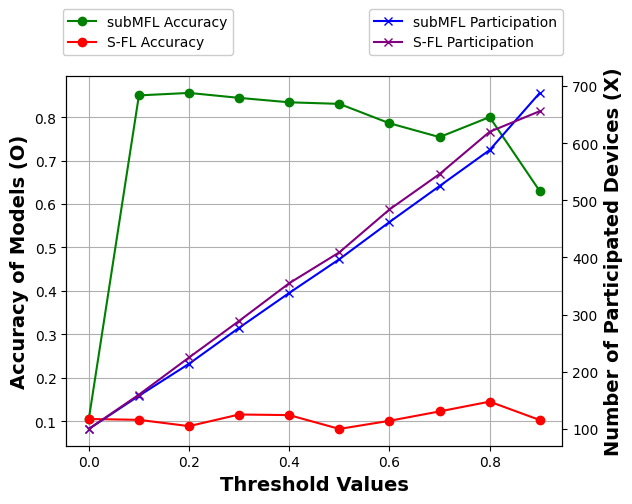

In [25]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
plt.grid()

# Our Algo. Acc.
ax.plot(df['Threshold'].values,
        df['subMFL Accuracy'].values,
        color="green",
        label='subMFL Accuracy',
        marker="o")

# S-FL Acc.
ax.plot(df['Threshold'].values,
        df['SFL Accuracy'].values,
        color="red",
        label='S-FL Accuracy',
        marker="o")

plt.legend(framealpha=1, frameon=True, bbox_to_anchor=(0.35, 1.2));

# set x-axis label
ax.set_xlabel("Threshold Values", fontweight='bold', fontsize=14)
# set y-axis label
ax.set_ylabel("Accuracy of Models (O)", color="black", fontweight='bold', fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['Threshold'].values,
         df['subMFL Participation'].values,
         color="blue",
         label='subMFL Participation',
         marker="x")

ax2.set_ylabel("Number of Participated Devices", color="black", fontweight='bold', fontsize=14)
# ax2.legend(loc='upper left', frameon=False)

# make a plot with different y-axis using second axis object
ax2.plot(df['Threshold'].values,
         df['SFL Participation'].values,
         color="purple",
         label='S-FL Participation',
         marker="x")

ax2.set_ylabel("Number of Participated Devices (X)", color="black", fontweight='bold', fontsize=14)

#plt.legend(lines[:2], ['first', 'second']);
# plt.title("Initial Accuracy values of Standard Federated Learning", fontweight="bold")
plt.legend(framealpha=1, frameon=True, bbox_to_anchor=(1.015, 1.2));
plt.show()

# save the plot as a file
fig.savefig('Accuracy&Participation vs Threshold with S-FL.jpg',
            format='jpeg', dpi=100, bbox_inches='tight')

### Initial Accuracy & Model Sparsity:

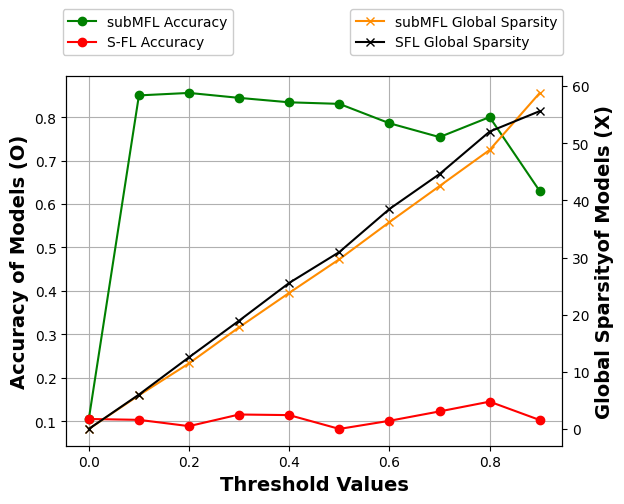

In [26]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
plt.grid()
# make a plot
ax.plot(df['Threshold'].values,
        df['subMFL Accuracy'].values,
        label='subMFL Accuracy',
        color="green",
        marker="o")

ax.plot(df['Threshold'].values,
        df['SFL Accuracy'].values,
        label='S-FL Accuracy',
        color="red",
        marker="o")

plt.legend(framealpha=1, frameon=True, bbox_to_anchor=(0.35, 1.2));

# set x-axis label
ax.set_xlabel("Threshold Values", fontweight='bold', fontsize = 14)
# set y-axis label
ax.set_ylabel("Accuracy of Models (O)", color="black", fontweight='bold', fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['Threshold'].values,
         df['subMFL Global Sparsity'].values,
         label='subMFL Global Sparsity',
         color="darkorange",
         marker="x")

ax2.set_ylabel("Global Sparsity", color="black", fontweight='bold', fontsize=14)


ax2.plot(df['Threshold'].values,
         df['SFL Global Sparsity'].values,
         color="black",
         label='SFL Global Sparsity',
         marker="x")

ax2.set_ylabel("Global Sparsityof Models (X)", color="black", fontweight='bold', fontsize=14)

plt.legend(framealpha=1, frameon=True, bbox_to_anchor=(1.015, 1.2));
plt.show()
# save the plot as a file
fig.savefig('Accuracy&Global_Sparsity vs Threshold with S-FL.jpg',
            format='jpeg', dpi=100, bbox_inches='tight')

***
### Initial Loss & Partcipation:

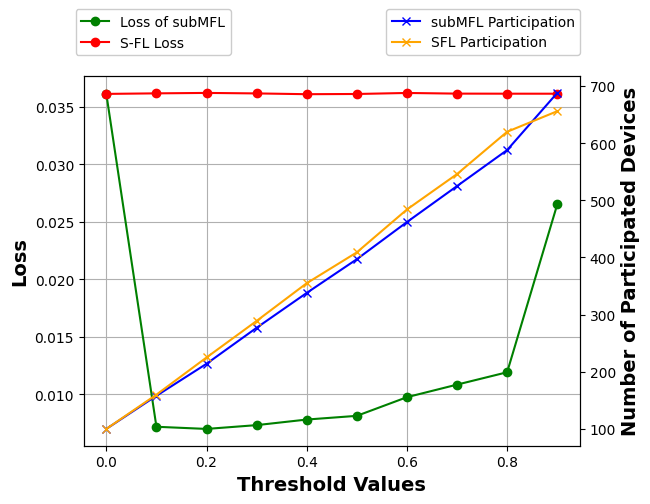

In [27]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
plt.grid()
# make a plot
ax.plot(df['Threshold'].values,
        df['subMFL Loss'].values,
        color="green",
        label='Loss of subMFL',
        marker="o")

ax.plot(df['Threshold'].values,
        df['SFL Loss'].values,
        color="red",
        label='S-FL Loss',
        marker="o")

plt.legend(framealpha=1, frameon=True, bbox_to_anchor=(0.31, 1.2));

# set x-axis label
ax.set_xlabel("Threshold Values", fontweight='bold', fontsize = 14)
# set y-axis label
ax.set_ylabel("Loss", color="black", fontweight='bold', fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['Threshold'].values,
         df['subMFL Participation'].values,
         label='subMFL Participation',
         color="blue",
         marker="x")
ax2.set_ylabel("Number of Participated Devices", fontweight='bold', color="black", fontsize=14)


ax2.plot(df['Threshold'].values,
         df['SFL Participation'].values,
         color="orange",
         label='SFL Participation',
         marker="x")

ax2.set_ylabel("Number of Participated Devices", color="black", fontweight='bold', fontsize=14)


plt.legend(framealpha=1, frameon=True, bbox_to_anchor=(1.015, 1.2));
plt.show()
# save the plot as a file
fig.savefig('Loss&Participation vs Threshold with S-FL.jpg',
            format='jpeg', dpi=100, bbox_inches='tight')

### Loss & Model Sparsity:

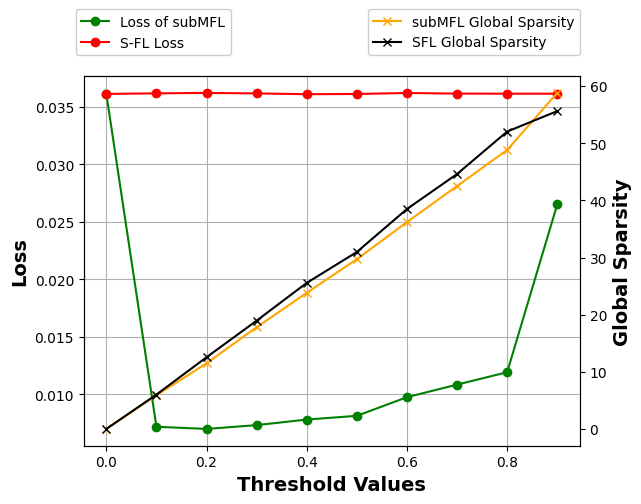

In [28]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots()
plt.grid()
# make a plot
ax.plot(df['Threshold'].values,
        df['subMFL Loss'].values,
        color="green",
        label='Loss of subMFL',
        marker="o")

ax.plot(df['Threshold'].values,
        df['SFL Loss'],
        color="red",
        label='S-FL Loss',
        marker="o")

plt.legend(framealpha=1, frameon=True, bbox_to_anchor=(0.31, 1.2));

# set x-axis label
ax.set_xlabel("Threshold Values", fontweight='bold', fontsize = 14)
# set y-axis label
ax.set_ylabel("Loss", color="black", fontweight='bold', fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df['Threshold'].values,
         df['subMFL Global Sparsity'].values,
         label='subMFL Global Sparsity',
         color="orange",
         marker="x")
ax2.set_ylabel("subMFL Global Sparsity",color="black", fontweight='bold', fontsize=14)

ax2.plot(df['Threshold'].values,
         df['SFL Global Sparsity'].values,
         color="black",
         label='SFL Global Sparsity',
         marker="x")

ax2.set_ylabel("Global Sparsity", color="black", fontweight='bold', fontsize=14)

plt.legend(framealpha=1, frameon=True, bbox_to_anchor=(1.015, 1.2));
plt.show()
# save the plot as a file
fig.savefig('Loss&Global_Sparsity vs Threshold with S-FL.jpg',
            format='jpeg', dpi=100, bbox_inches='tight')